# Music Genre Classification Project 
by James Potash, Rohan Poddar, Xena Maayah, Yijun Zhao, and Noame de-Boerdere

We use this notebook to explore the different data files that we have - Image representation of the Audio files, 3 second and 30 second Audio features

In [1]:
# Importing the required libraries
import math
import numpy as np
import os
from scipy import sparse
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm
%matplotlib inline
import librosa
import librosa.display
import IPython
import sklearn
from sklearn.preprocessing import minmax_scale
from sklearn import preprocessing
from sklearn.decomposition import PCA
from librosa.feature import spectral_rolloff


import warnings
warnings.filterwarnings("ignore")

In [2]:
# Setting up path and variables
seed = 12
np.random.seed(seed)

path = "../Data/"
path_audio_files = path + "genres_original/"
hop_length = 512
n_fft = 2048

genre_dict = {"blues":0,"classical":1,"country":2,"disco":3,"hiphop":4,"jazz":5,"metal":6,"pop":7,"reggae":8,"rock":9}

In [3]:
# Load audio file names and genres
img_folder = "Waveshow/"
df = pd.DataFrame()
g_list = []
file_list = []

for genre in genre_dict:
    for file_name in os.listdir(path_audio_files + genre):
        if file_name.endswith(".wav"):
            file_list.append(file_name)
            g_list.append(genre)
    
df['filename'] = file_list
df['class'] = g_list

In [4]:
df['class'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: class, dtype: int64

## Visualizing the Audio Files

### Waveshow of the Audio Files

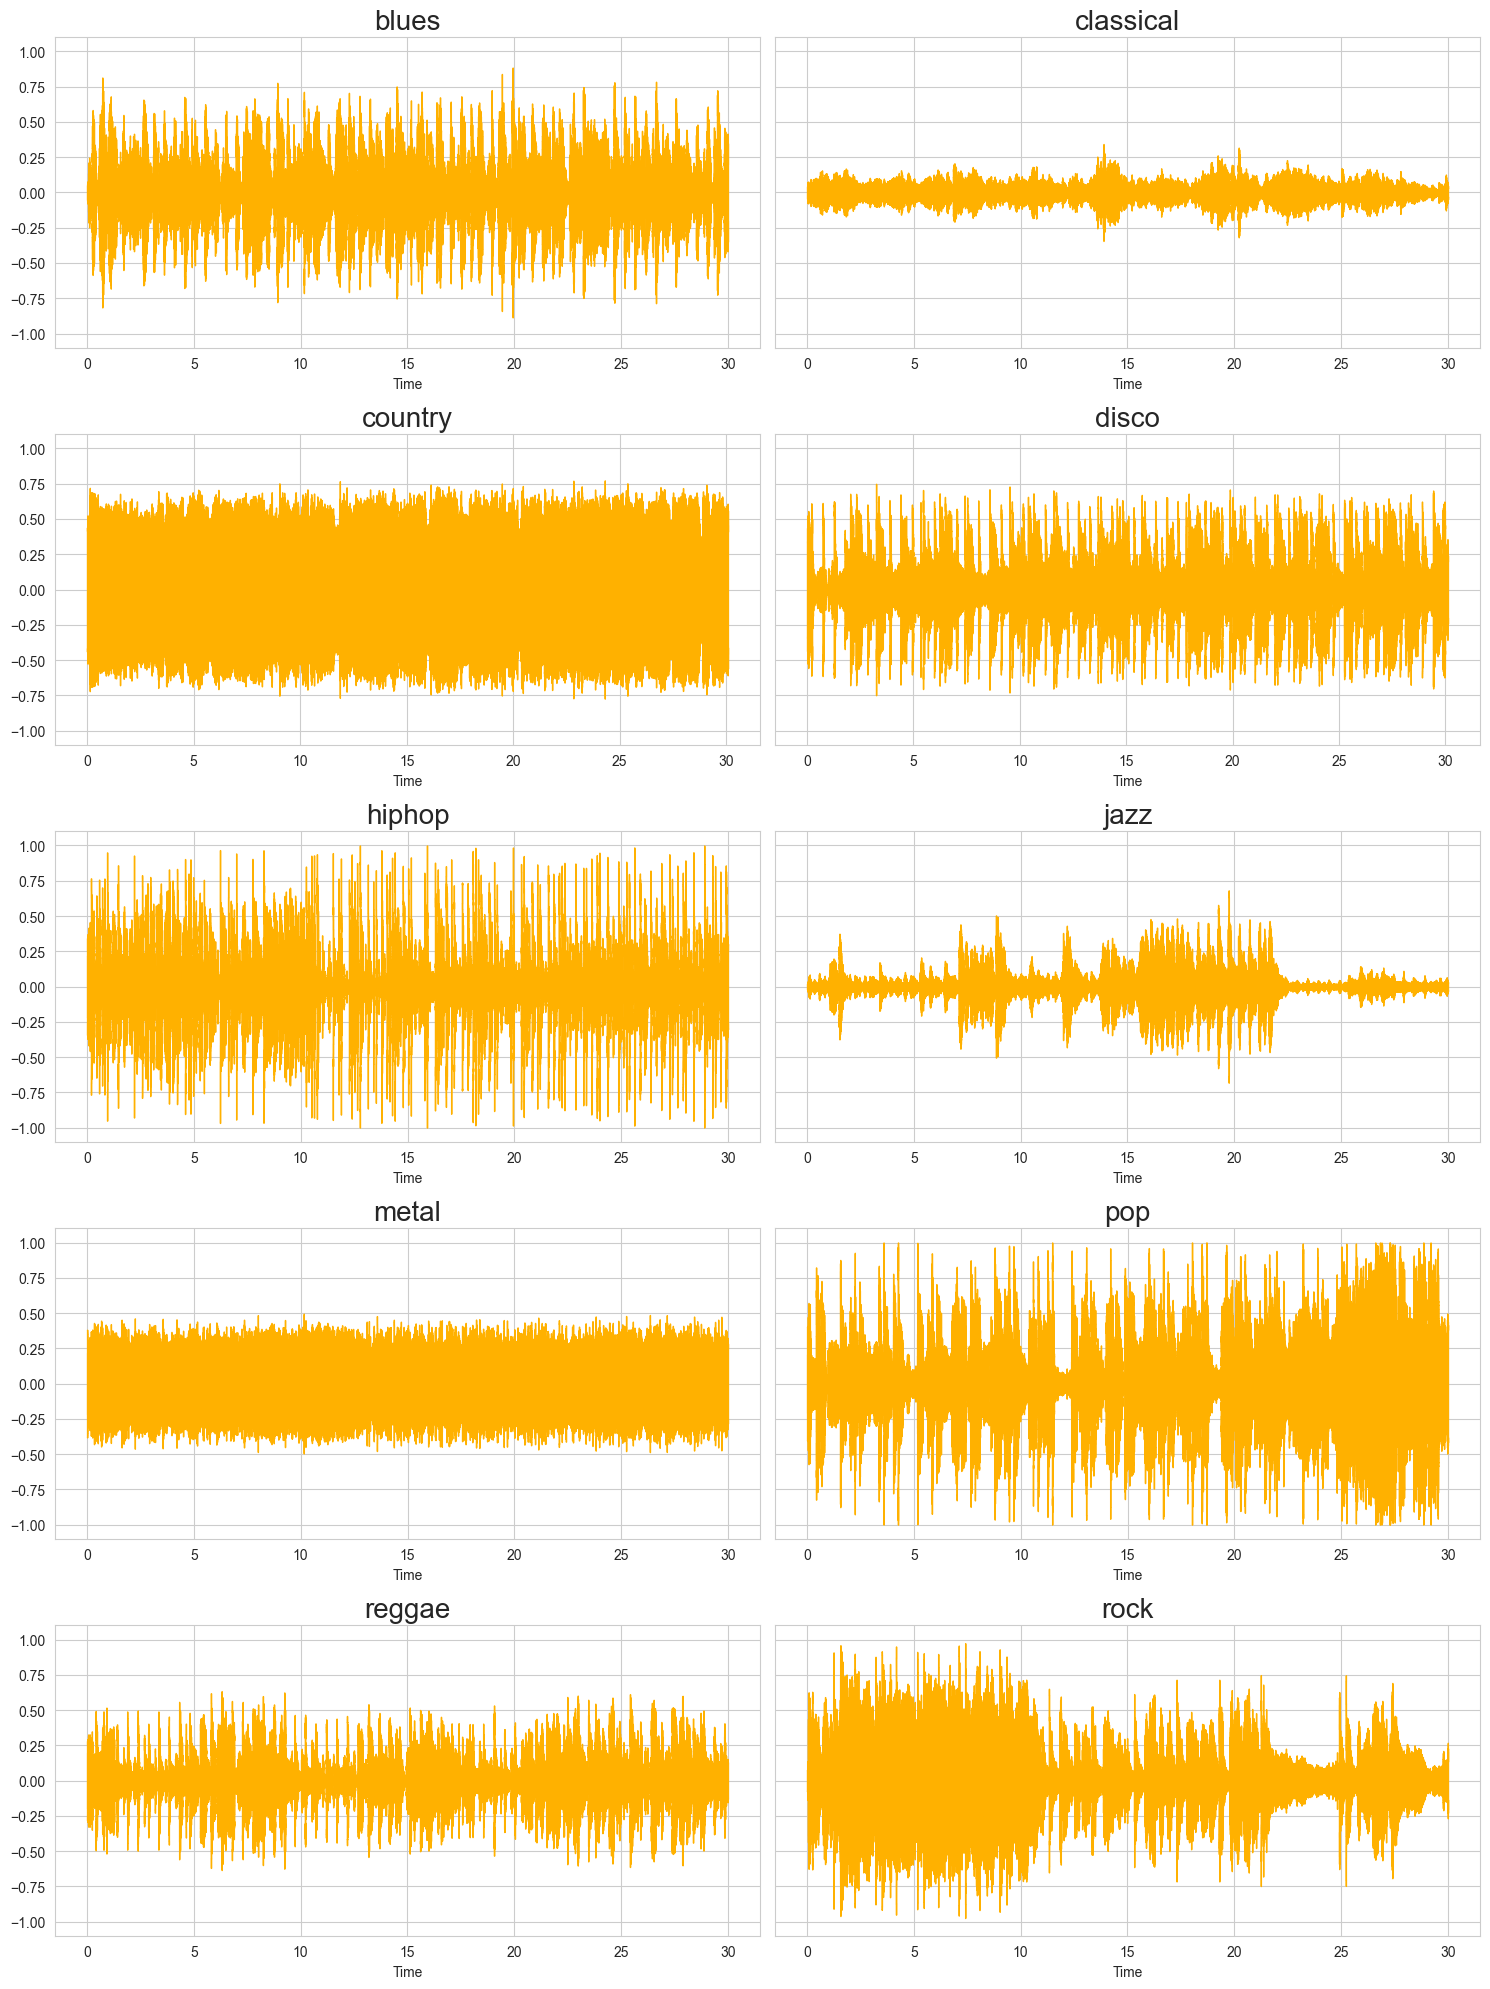

In [5]:
fig, axes= plt.subplots(nrows=5, ncols=2, figsize=(15, 20), sharey=True)
i = 0
j = 0
for genre in genre_dict.keys():
    # Reading the first audio file
    data,sampling_rate = librosa.load(path_audio_files + genre + "/" + genre + ".00000.wav")
    librosa.display.waveshow(y = data, sr = sampling_rate, color = "#FFB100",ax=axes[i][j])
    axes[i][j].set_title(genre, fontsize = 20)
    if(j == 1):
        i = i + 1
        j = 0
    else:
        j = j + 1

plt.tight_layout()
plt.show()

### Waveshow + Spectral Centroids of the Audio Files

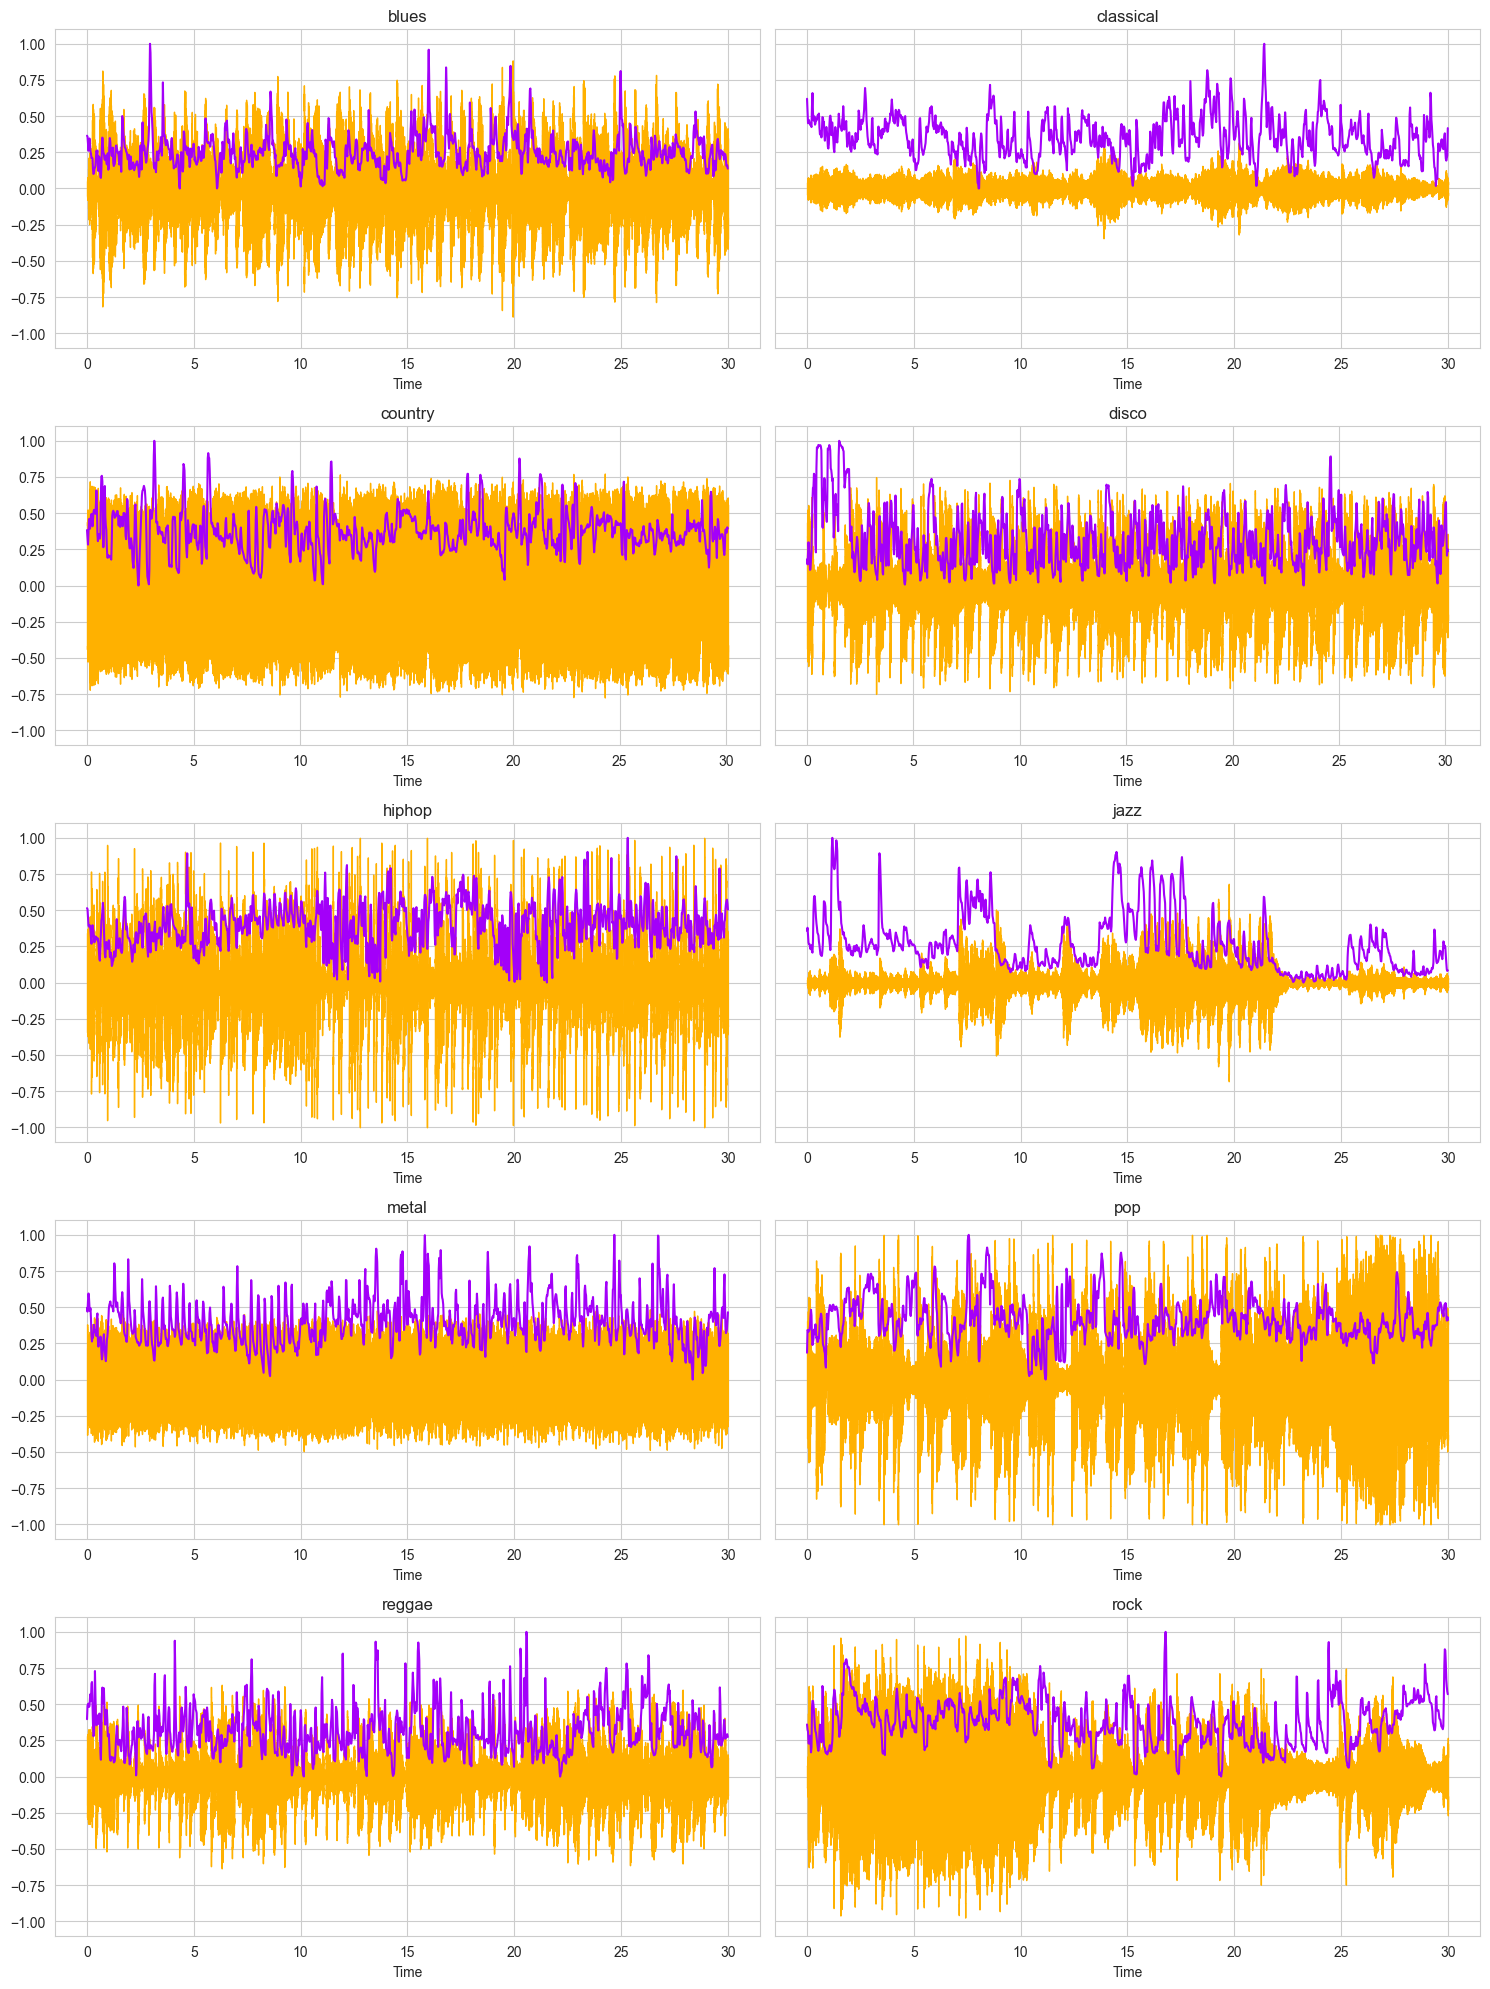

In [6]:
fig, axes= plt.subplots(nrows=5, ncols=2, figsize=(15, 20), sharey=True)
i = 0
j = 0
for genre in genre_dict.keys():
    data,sampling_rate = librosa.load(path_audio_files + genre + "/" + genre + ".00000.wav")
    spectral_centroids = librosa.feature.spectral_centroid(y=data, sr=sampling_rate)[0]
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(data, sr=sampling_rate, color = '#FFB100',ax=axes[i][j])
    axes[i][j].plot(t, minmax_scale(spectral_centroids, axis=0), color='#A300F9')
    axes[i][j].set_title(genre)
    if(j == 1):
        i = i + 1
        j = 0
    else:
        j = j + 1

plt.tight_layout()
plt.show()

### Waveshow + Tempo and Beats of the Audio File

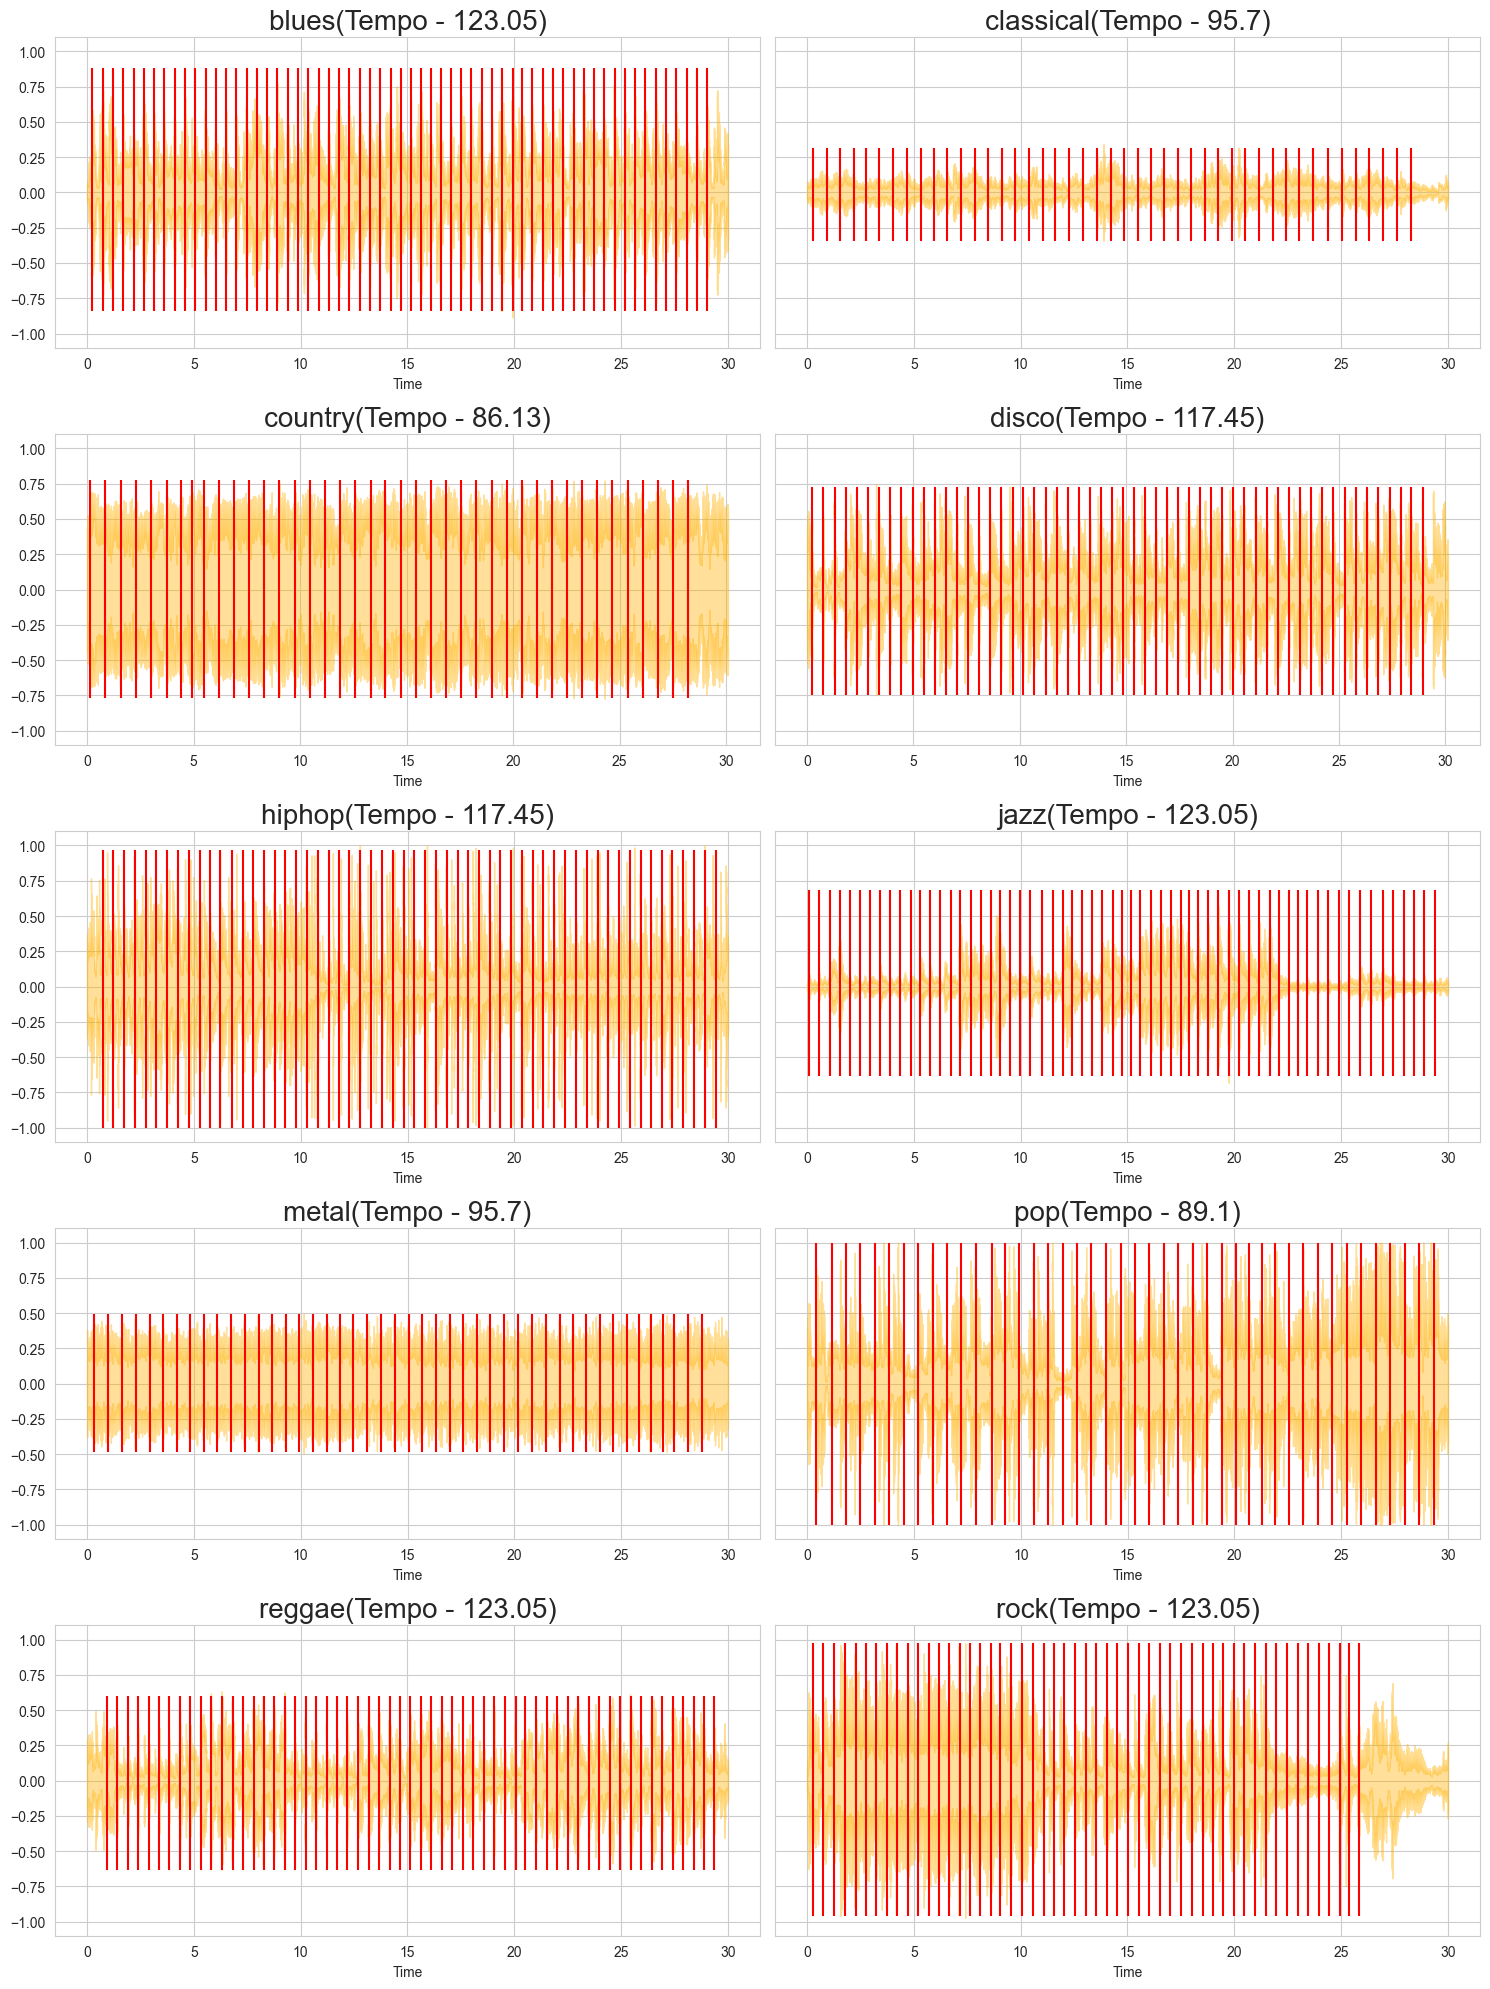

In [7]:
fig, axes= plt.subplots(nrows=5, ncols=2, figsize=(15, 20), sharey = True)
i = 0
j = 0
for genre in genre_dict.keys():
    data,sampling_rate = librosa.load(path_audio_files + genre + "/" + genre + ".00000.wav")
    tempo, beat_times = librosa.beat.beat_track(y=data, sr=sampling_rate, units='time')
    librosa.display.waveshow(y = data, sr = sampling_rate, color = "#FFB100",alpha = 0.4,ax=axes[i][j])
    axes[i][j].vlines(beat_times, np.min(data), np.max(data), color='r')
    axes[i][j].set_title(genre + "(Tempo - " + str(round(tempo,2)) + ")", fontsize = 20)
    if(j == 1):
        i = i + 1
        j = 0
    else:
        j = j + 1

plt.tight_layout()
plt.show()

### Decibel-Scaled Spectrograms of the Audio Files

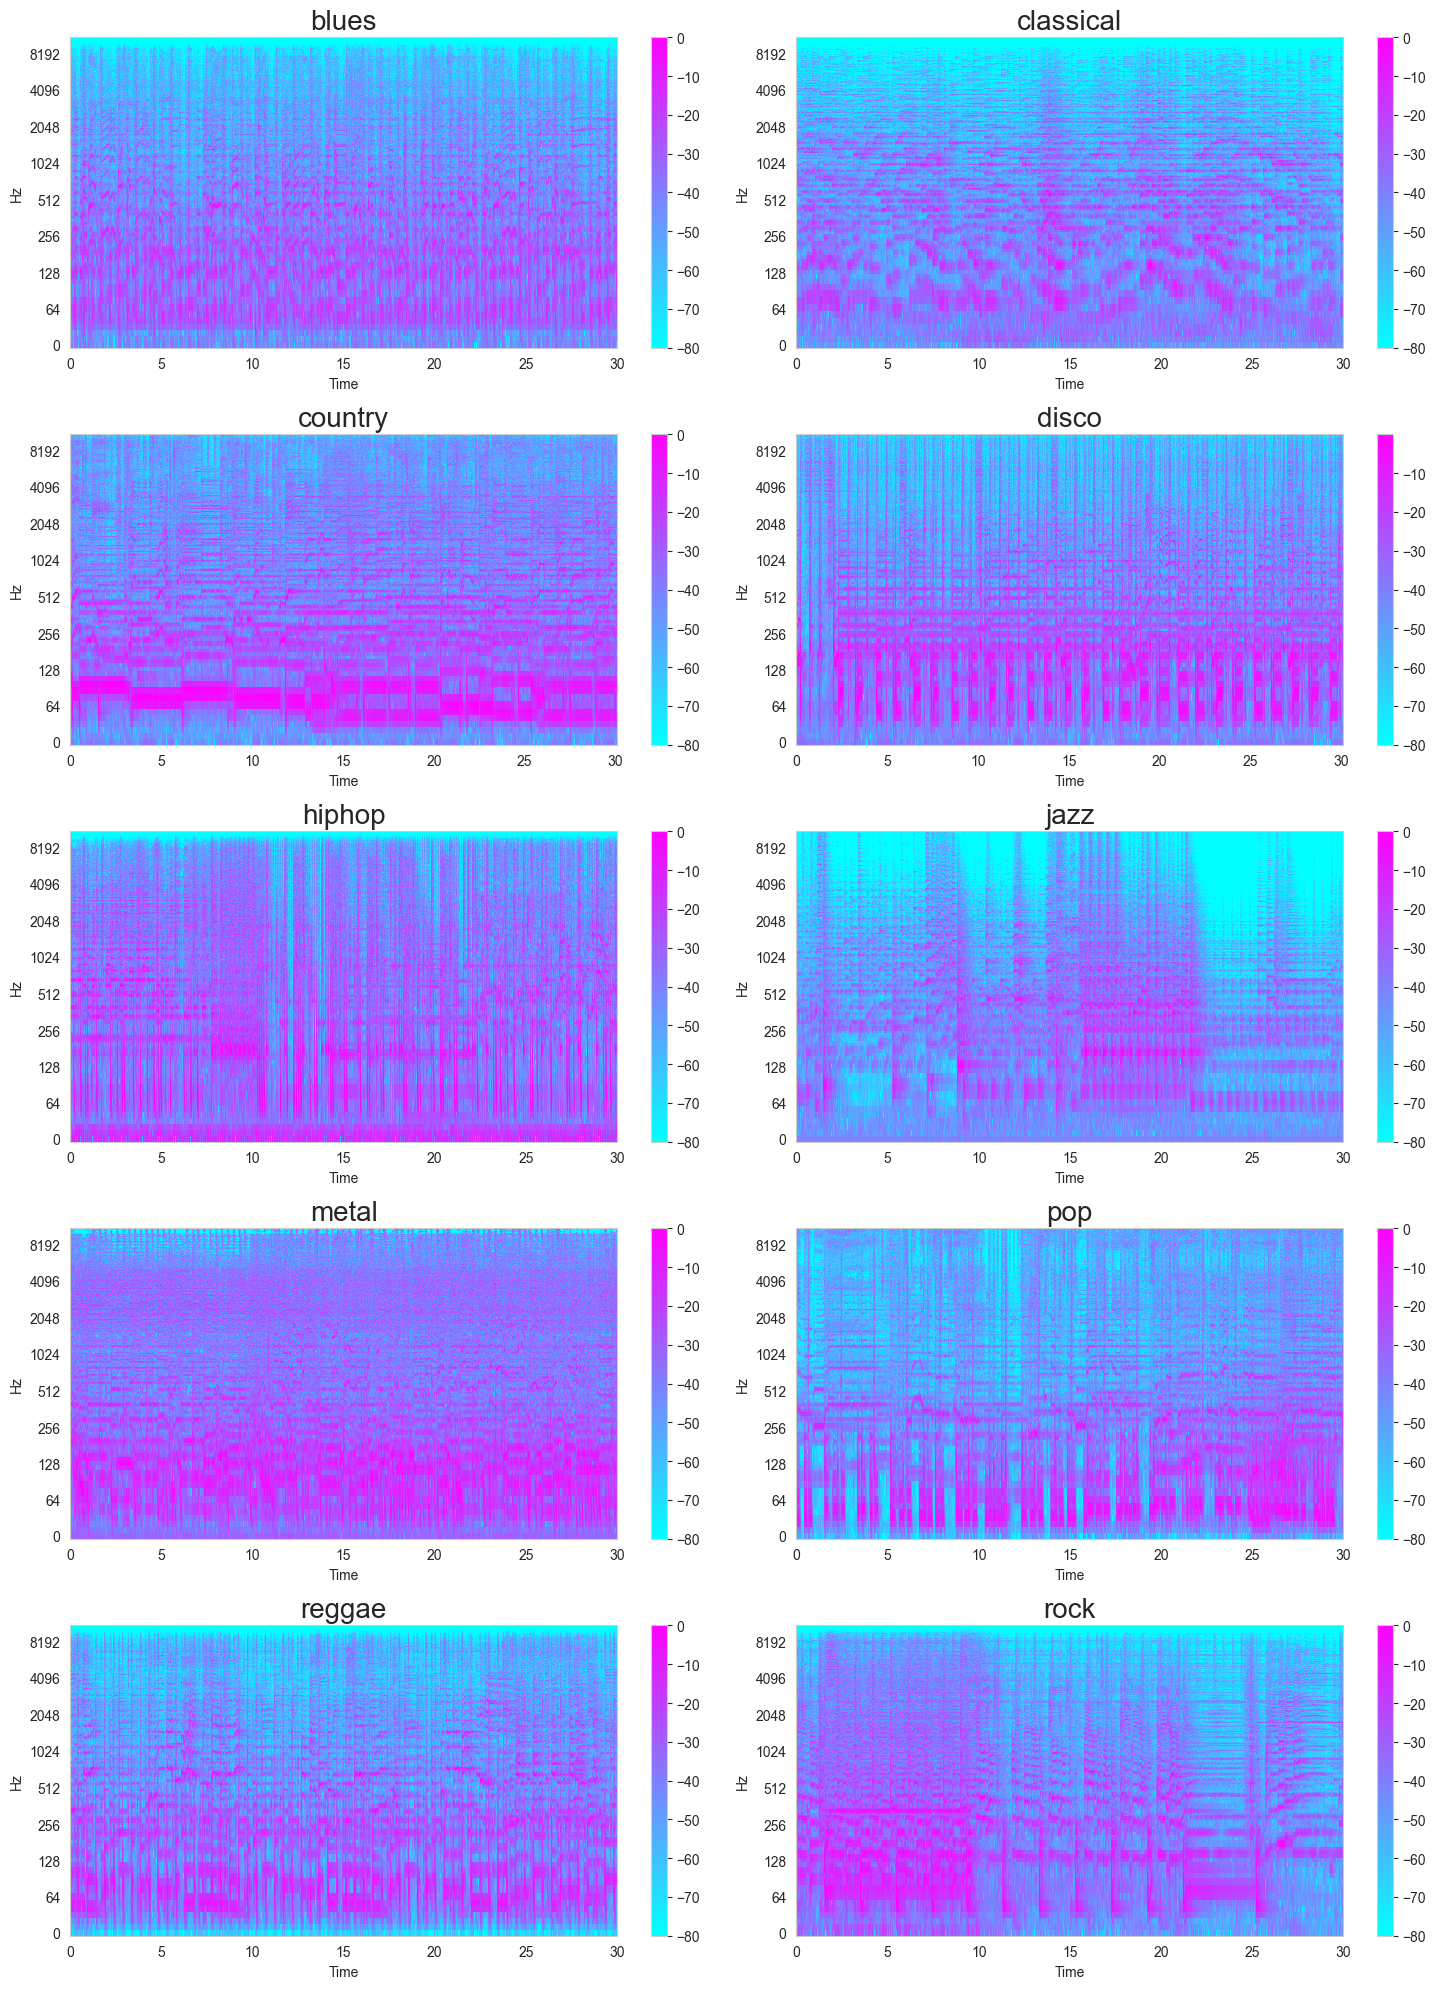

In [8]:
fig, axes= plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
i = 0
j = 0
for genre in genre_dict.keys():
    data,sampling_rate = librosa.load(path_audio_files + genre + "/" + genre + ".00000.wav")
    stft_data = np.abs(librosa.stft(y = data, n_fft = n_fft,hop_length = hop_length))
    DB = librosa.amplitude_to_db(stft_data, ref = np.max)
    img = librosa.display.specshow(DB, sr = sampling_rate, hop_length = hop_length, x_axis = 'time', y_axis = 'log',cmap = 'cool',ax=axes[i][j])
    fig.colorbar(img, ax=axes[i][j])
    axes[i][j].set_title(genre, fontsize = 20)
    if(j == 1):
        i = i + 1
        j = 0
    else:
        j = j + 1

plt.tight_layout()
plt.show()

### Mel Spectrograms of the Audio Files

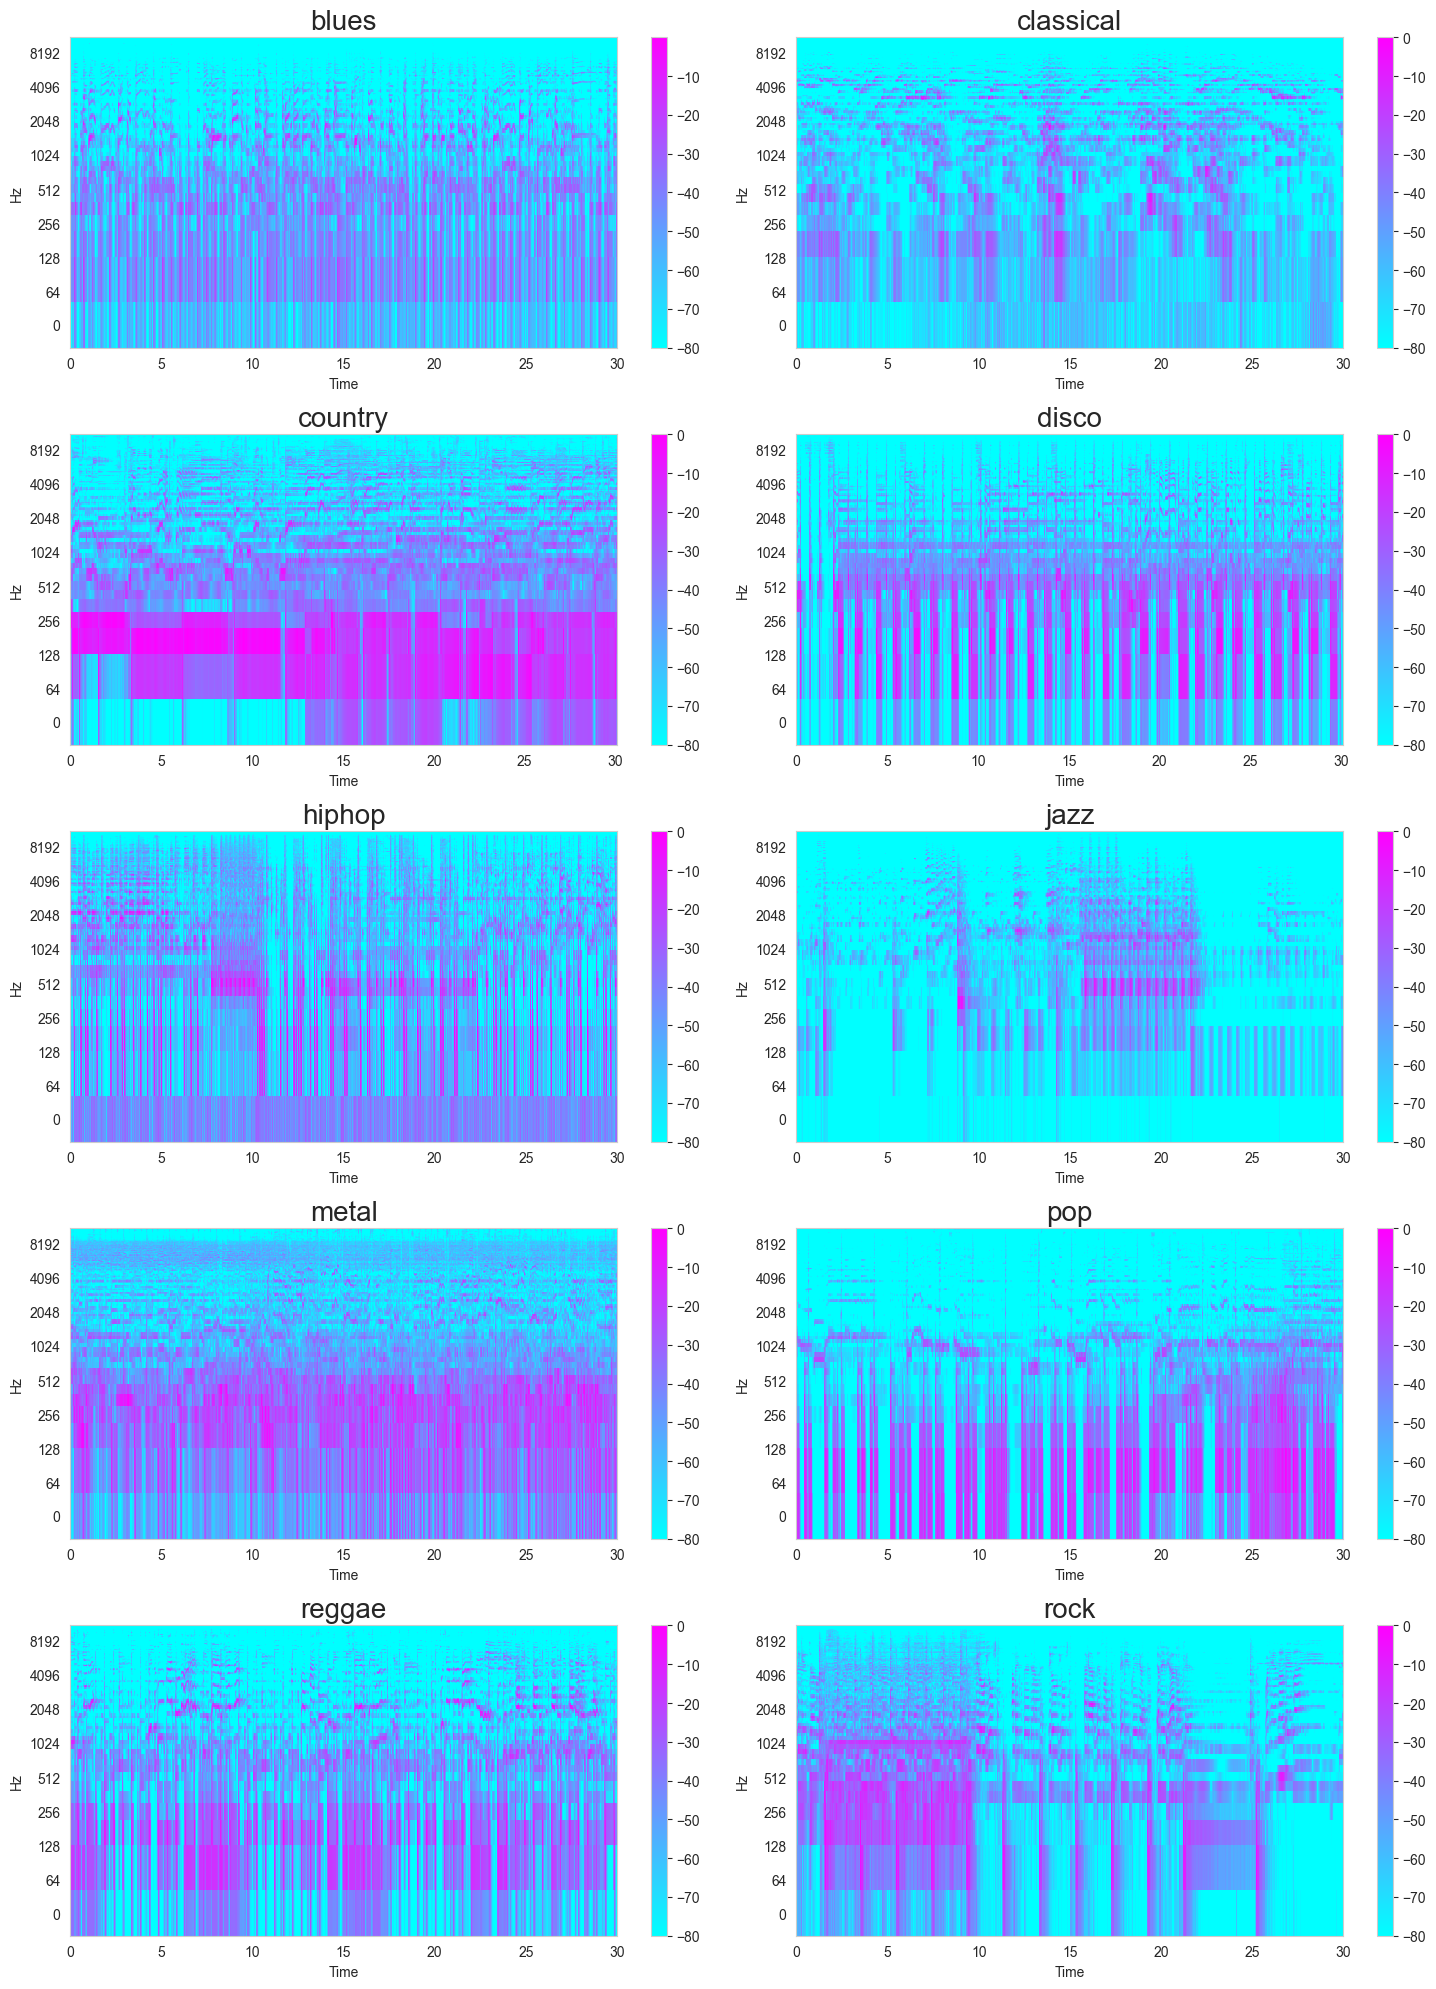

In [9]:
fig, axes= plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
i = 0
j = 0
for genre in genre_dict.keys():
    # Reading the first audio file
    data,sampling_rate = librosa.load(path_audio_files + genre + "/" + genre + ".00000.wav")
    
    mel_spec = librosa.feature.melspectrogram(y = data, sr=sampling_rate, hop_length = hop_length)
    mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

    img = librosa.display.specshow(mel_spec_db, sr = sampling_rate, hop_length = hop_length, x_axis = 'time', y_axis = 'log',cmap = 'cool',ax=axes[i][j])
    fig.colorbar(img, ax=axes[i][j])
    
    axes[i][j].set_title(genre, fontsize = 20)

    if(j == 1):
        i = i + 1
        j = 0
    else:
        j = j + 1

plt.tight_layout()
plt.show()

### MFCC Plot of the Audio Files

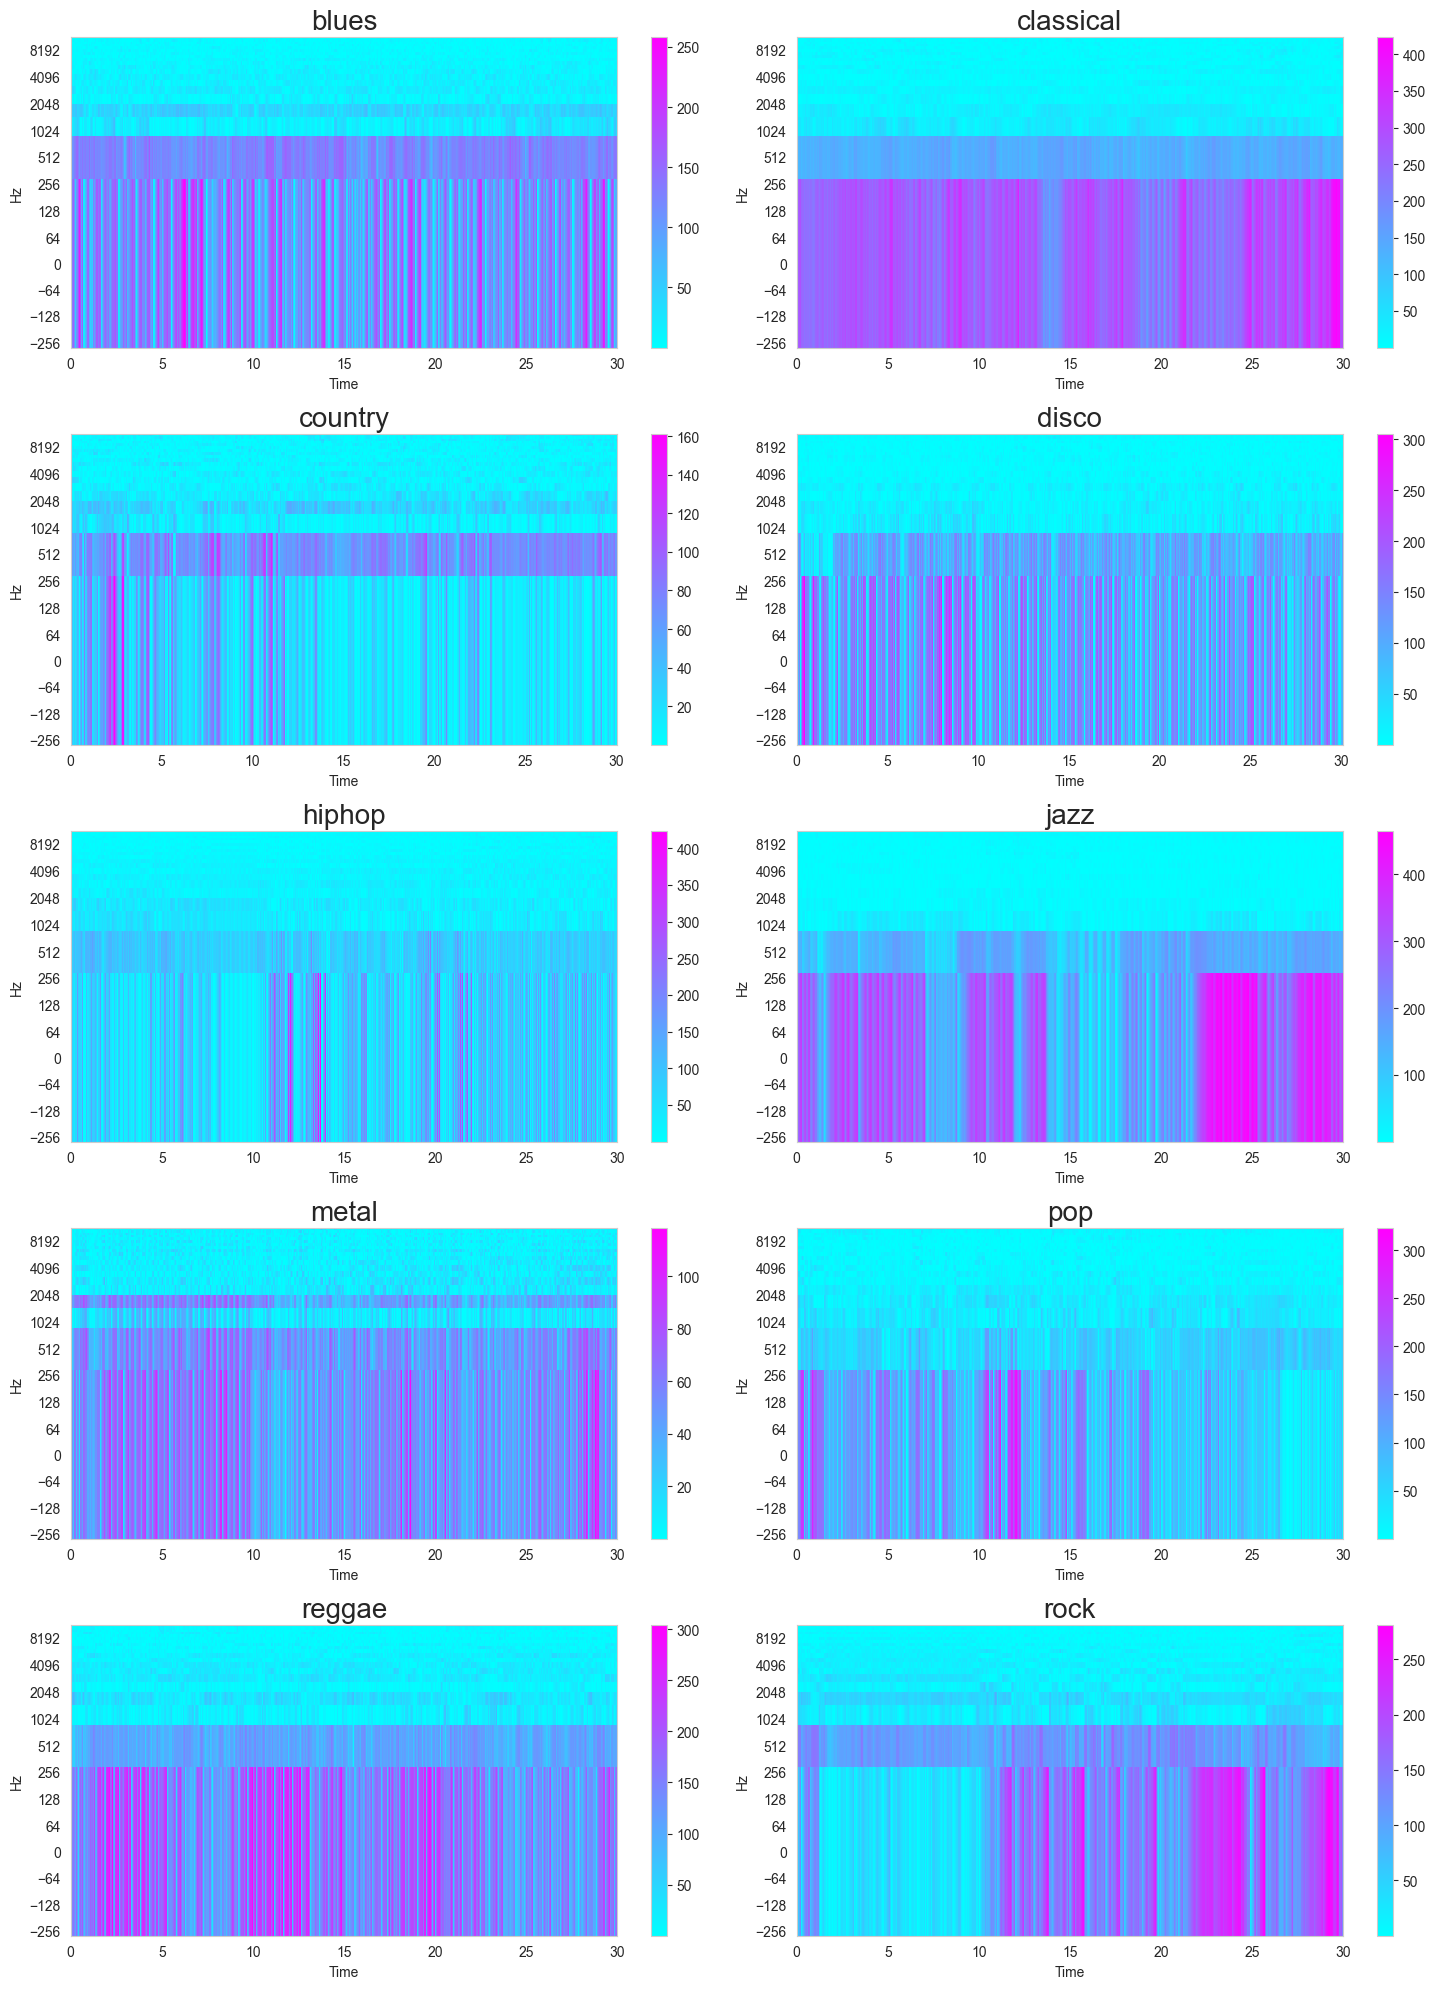

In [10]:
fig, axes= plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
i = 0
j = 0
for genre in genre_dict.keys():
    data,sampling_rate = librosa.load(path_audio_files + genre + "/" + genre + ".00000.wav")
    mfcc_data = np.abs(librosa.feature.mfcc(y = data, sr = sampling_rate))
    img = librosa.display.specshow(mfcc_data, sr = sampling_rate, x_axis = 'time', y_axis = 'log',cmap = 'cool',ax=axes[i][j])
    fig.colorbar(img, ax=axes[i][j])
    axes[i][j].set_title(genre, fontsize = 20)
    if(j == 1):
        i = i + 1
        j = 0
    else:
        j = j + 1

plt.tight_layout()
plt.show()

## EDA of the 30 second features

In [11]:
df_30 = pd.read_csv(path + "features_30_sec.csv")
df_30.head(5)

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516           213843.755497  ...   55.356403   
2              1747.702312            76254.192257  ...   40.598766   
3              1596.412872           166441.494769  ...   44.427753   
4              1748.172116            88445.209036  ...   86.099236   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.690215   36.524071    -0.408979   41.597103    -2.303523   55.062923   
1    -0.731125   60.314529     0.295073   48.120598    -0.283518   51.106190   
2    -7.729093   47.639427    -1.816407   52.382141    -3.439720   46.639660   
3    -3.319597   50.206673     0.636965   37.319130    -0.619121   37.259739   
4    -5.454034   75.269707    -0.916874   53.613918    -4.404827   62.910812   

   mfcc20_mean  mfcc20_var  label  
0     1.221291   46.936035  blues  
1     0.531217   45.786282  blues  
2    -2.231258   30.573025  blues  
3    -3.407448   31.949339  blues  
4   -11.703234   55.195160  blues  

[5 rows x 60 columns]

In [12]:
df_30.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [13]:
df_30.isna().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [14]:
df_30['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

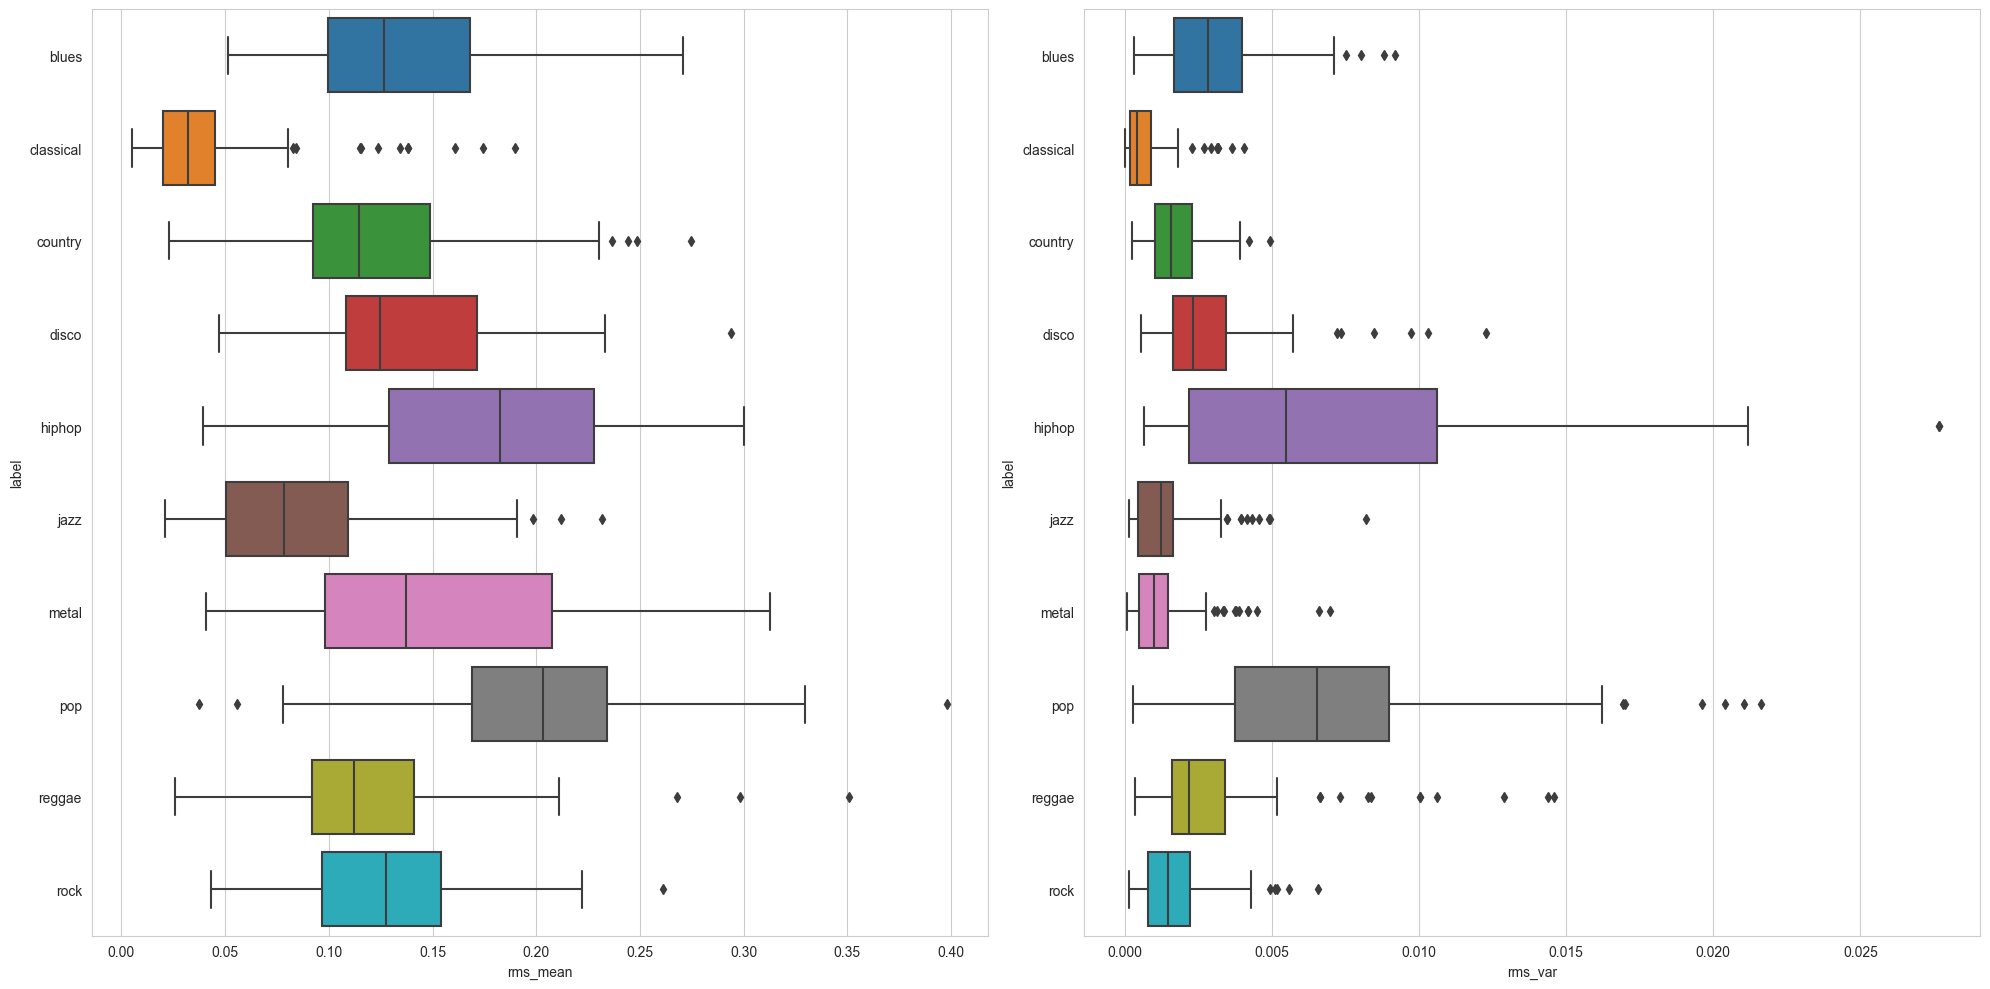

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(y='label', x='rms_mean', data=df_30, ax=axs[0])
sns.boxplot(y='label', x='rms_var', data=df_30, ax=axs[1])
plt.tight_layout()

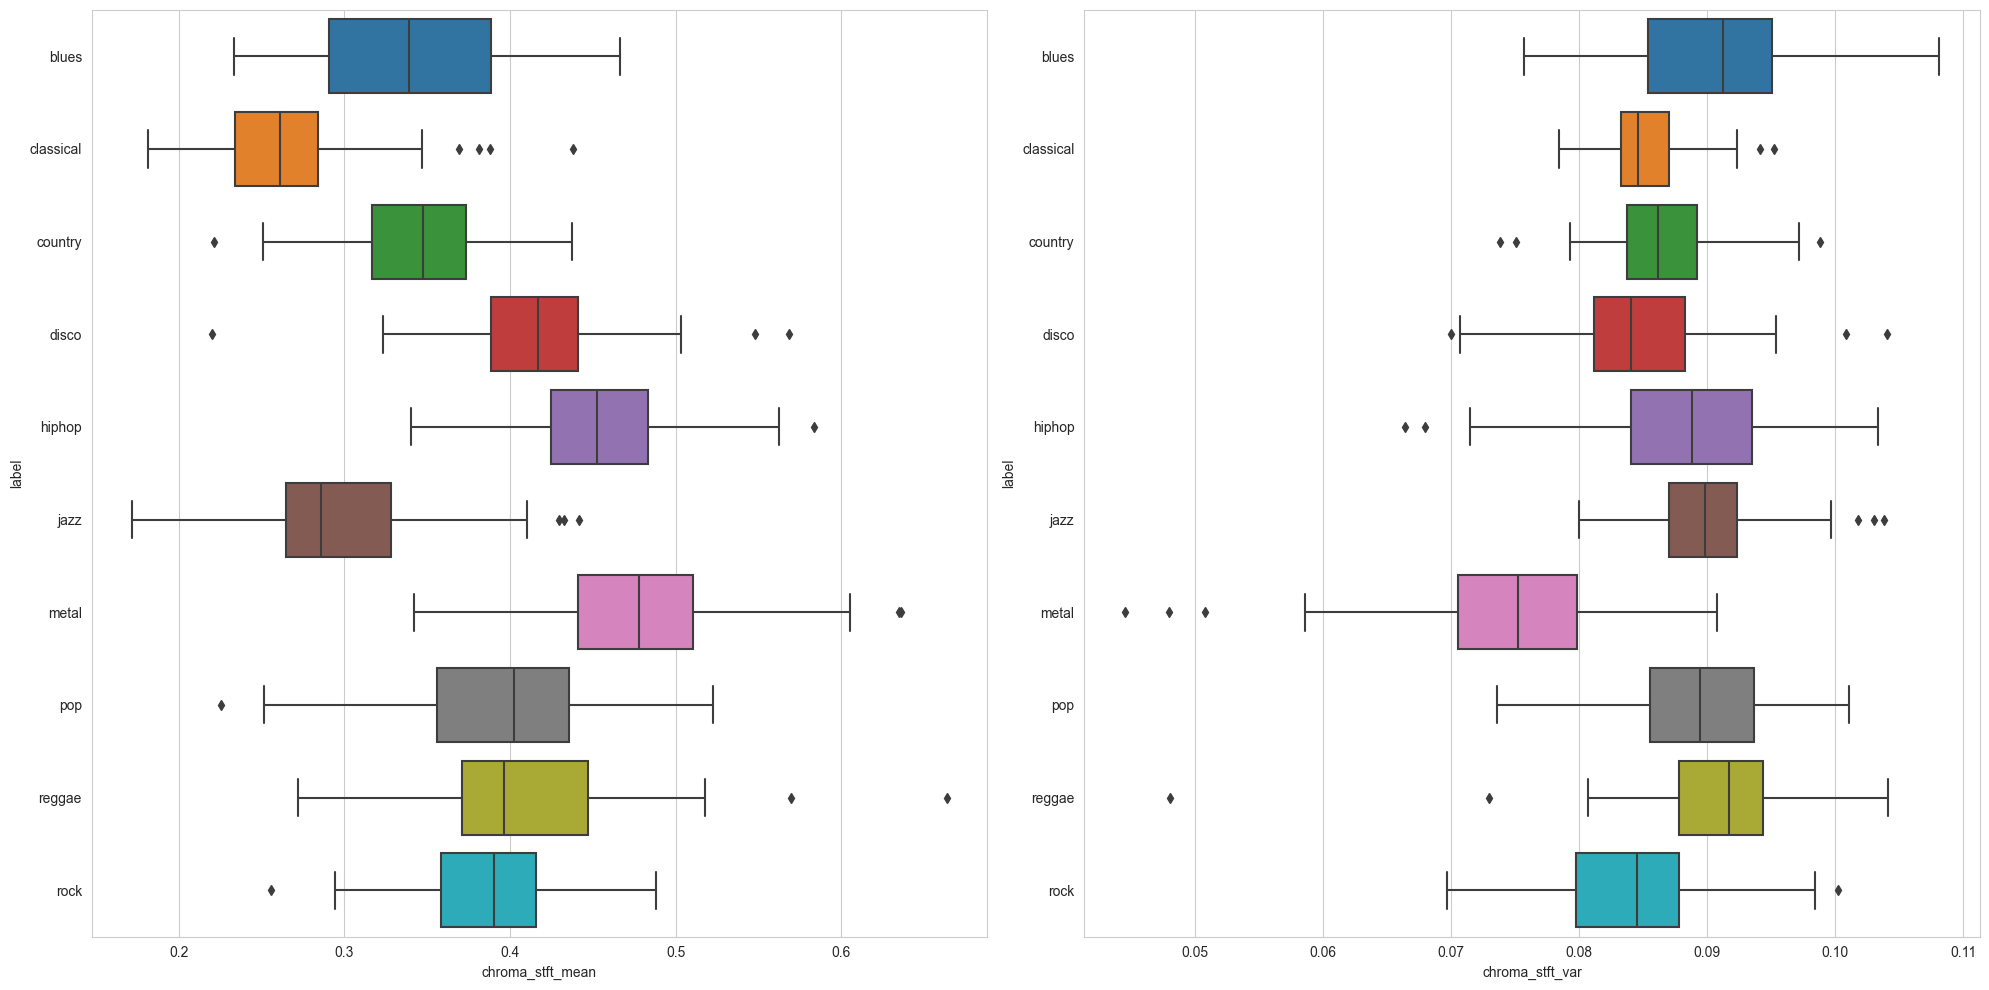

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(y='label', x='chroma_stft_mean', data=df_30, ax=axs[0])
sns.boxplot(y='label', x='chroma_stft_var', data=df_30, ax=axs[1])
plt.tight_layout()

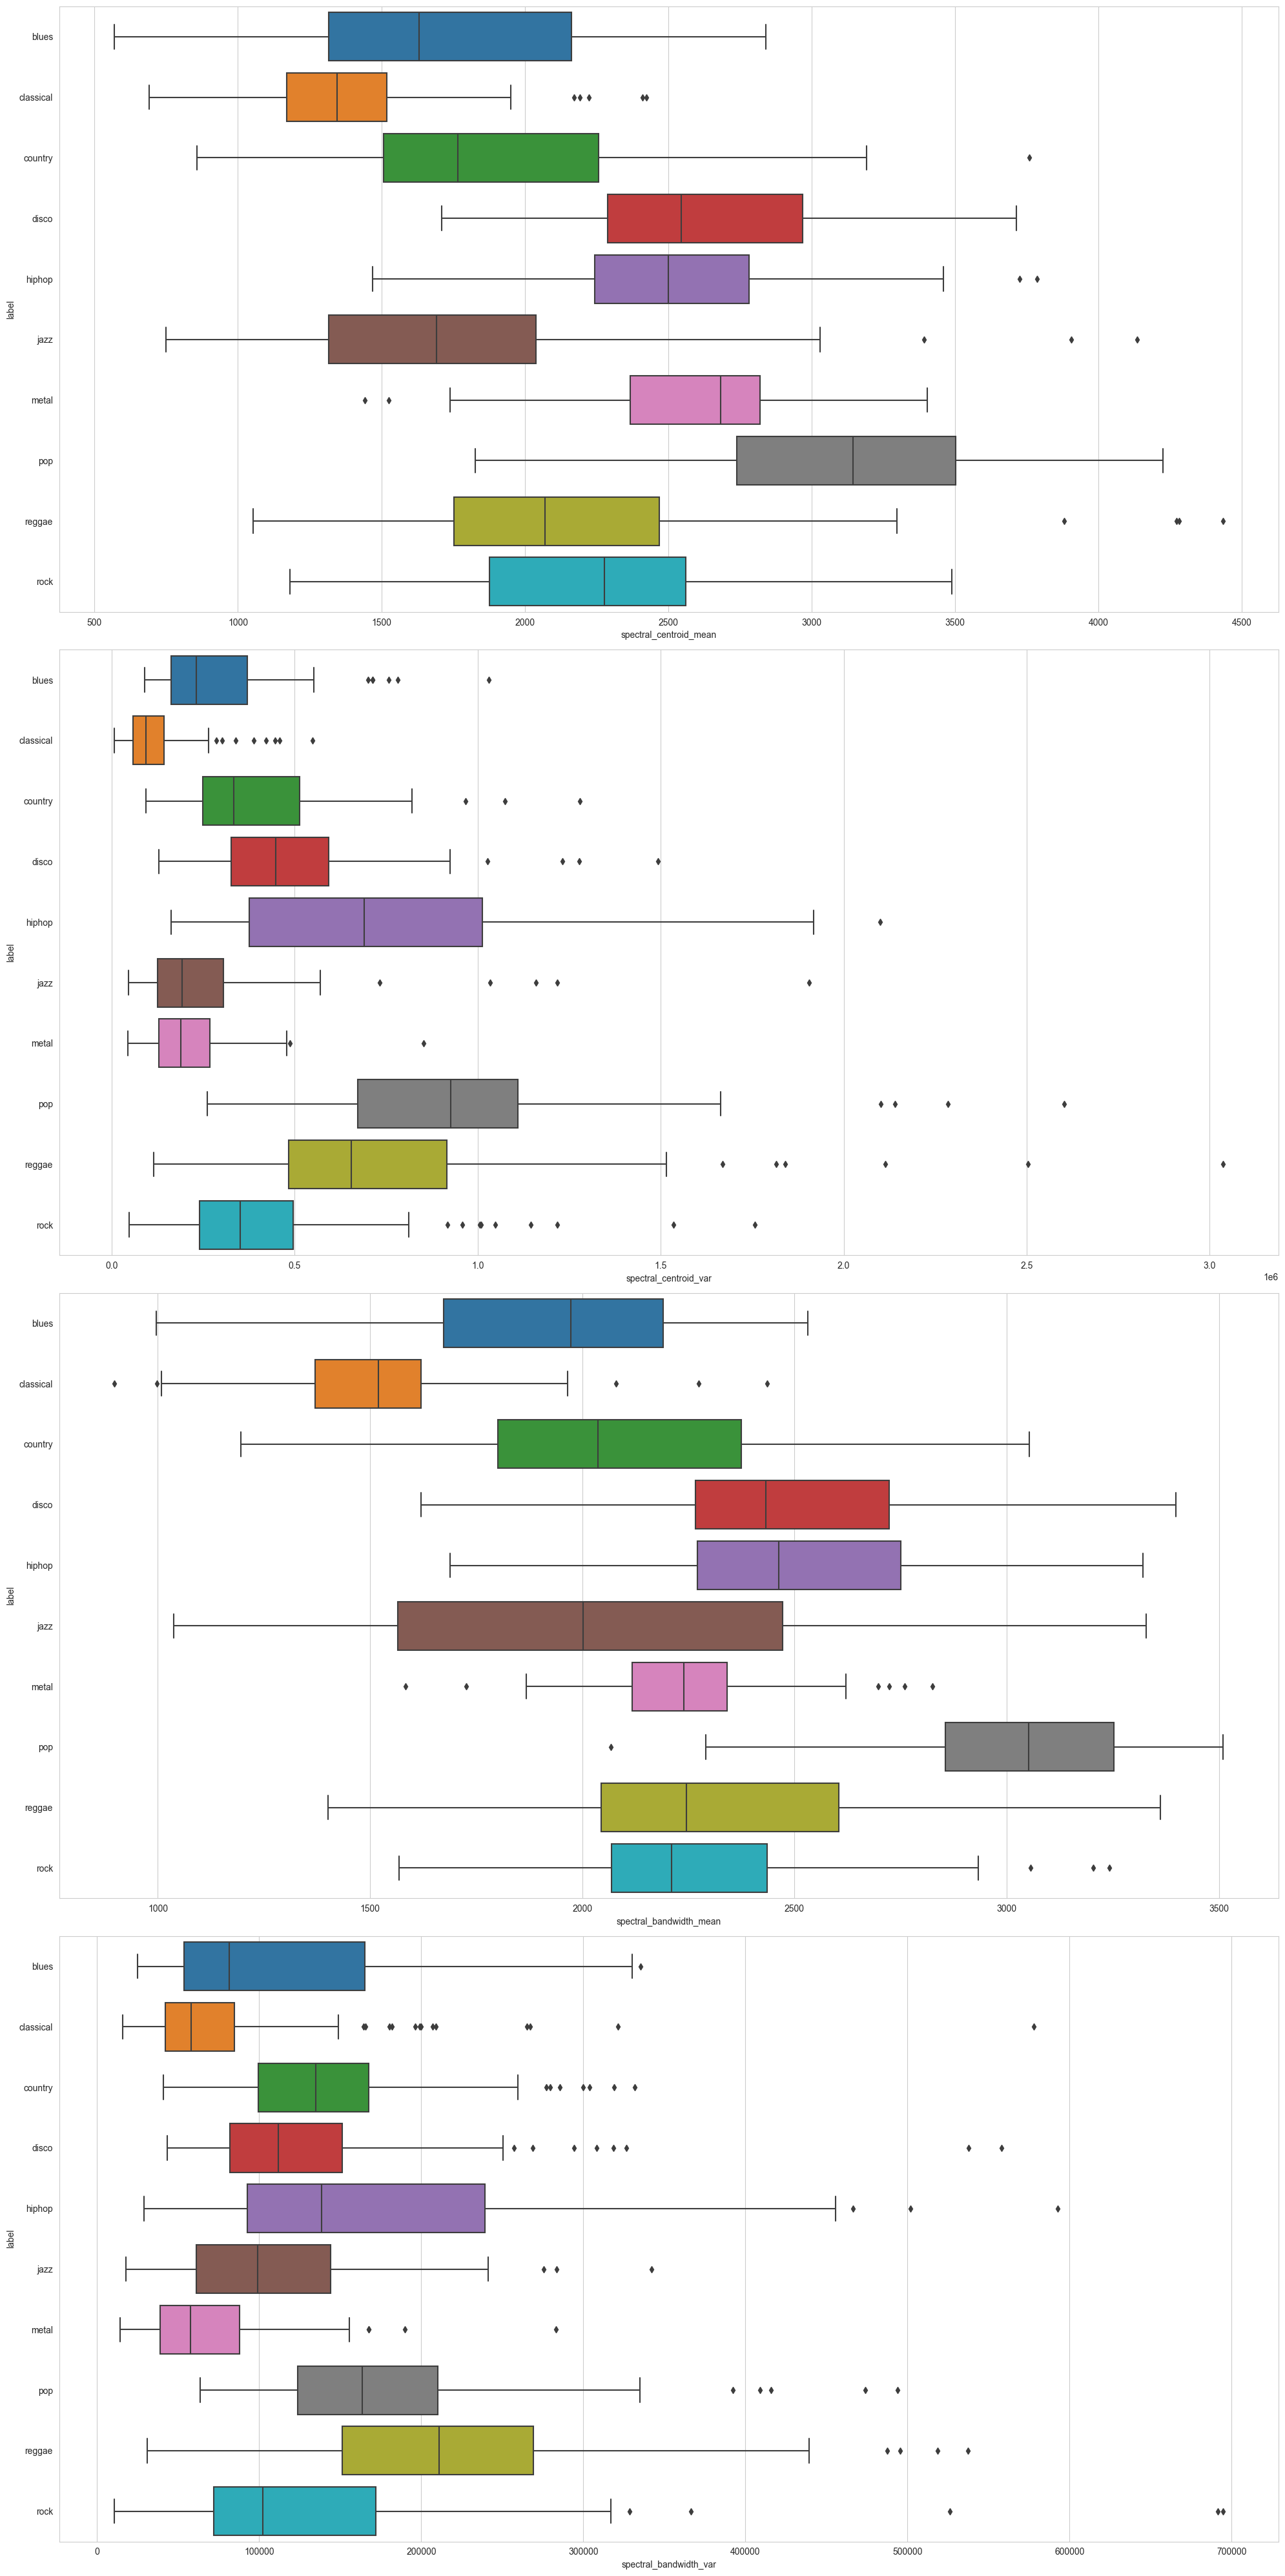

In [17]:
fig, axs = plt.subplots(4, 1, figsize=(20, 40))
sns.boxplot(y='label', x='spectral_centroid_mean', data=df_30, ax=axs[0])
sns.boxplot(y='label', x='spectral_centroid_var', data=df_30, ax=axs[1])
sns.boxplot(y='label', x='spectral_bandwidth_mean', data=df_30, ax=axs[2])
sns.boxplot(y='label', x='spectral_bandwidth_var', data=df_30, ax=axs[3])
plt.tight_layout()

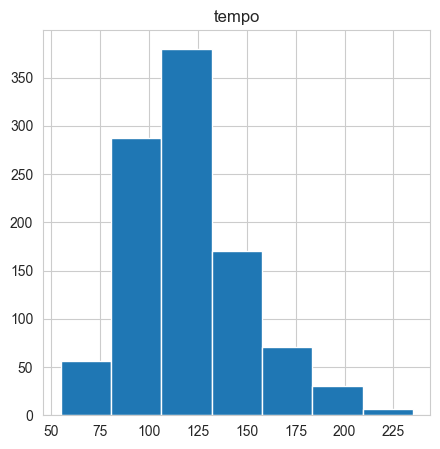

In [18]:
df_30.hist(column = ["tempo"], bins = 7, figsize=(5, 5))
plt.show()

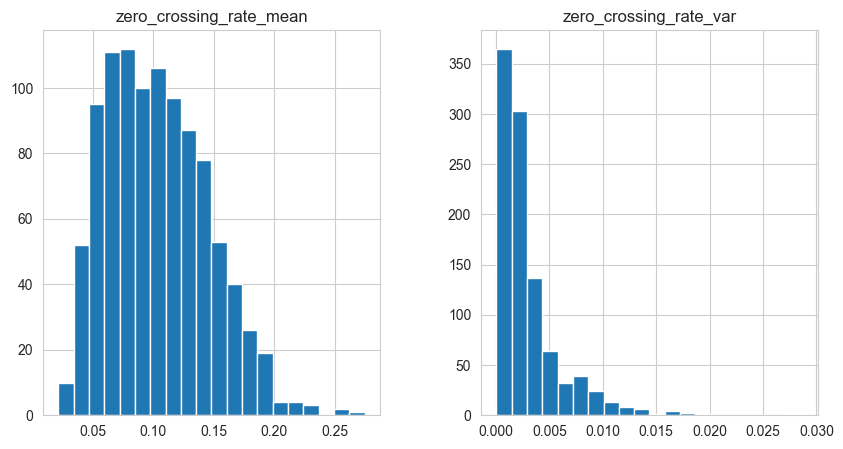

In [19]:
df_30.hist(column = ["zero_crossing_rate_mean", "zero_crossing_rate_var"], bins = 20, figsize=(10, 5))
plt.show()

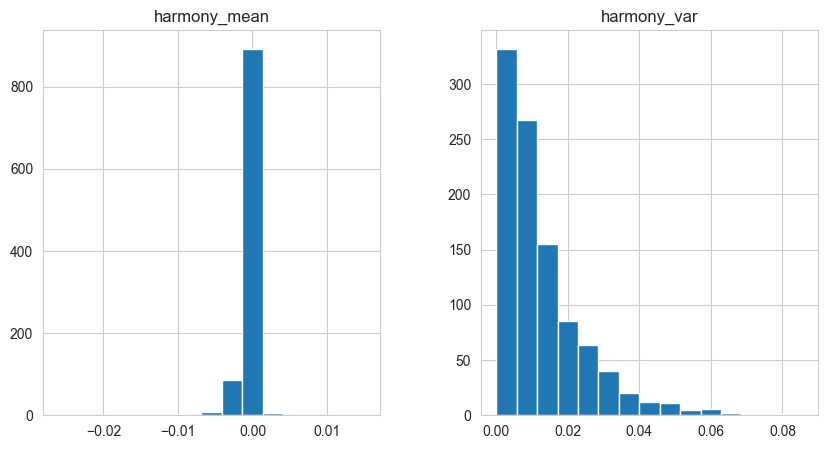

In [20]:
df_30.hist(column = ["harmony_mean", "harmony_var"], bins = 15, figsize=(10, 5))
plt.show()

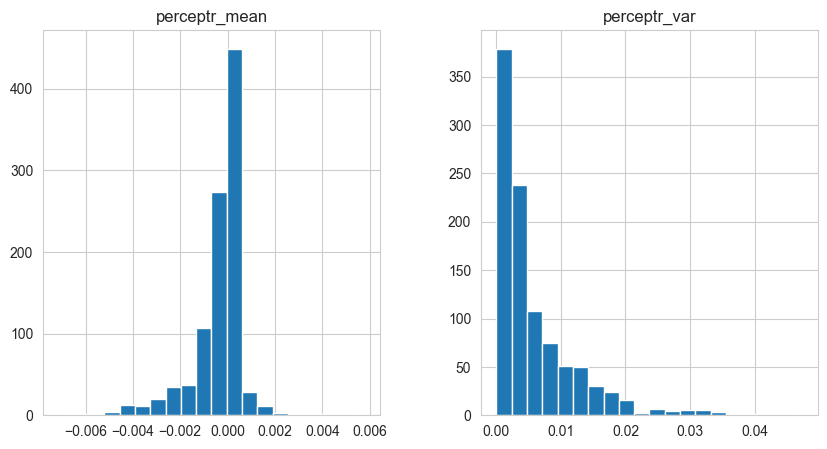

In [21]:
df_30.hist(column = ["perceptr_mean", "perceptr_var"], bins = 20, figsize=(10, 5))
plt.show()

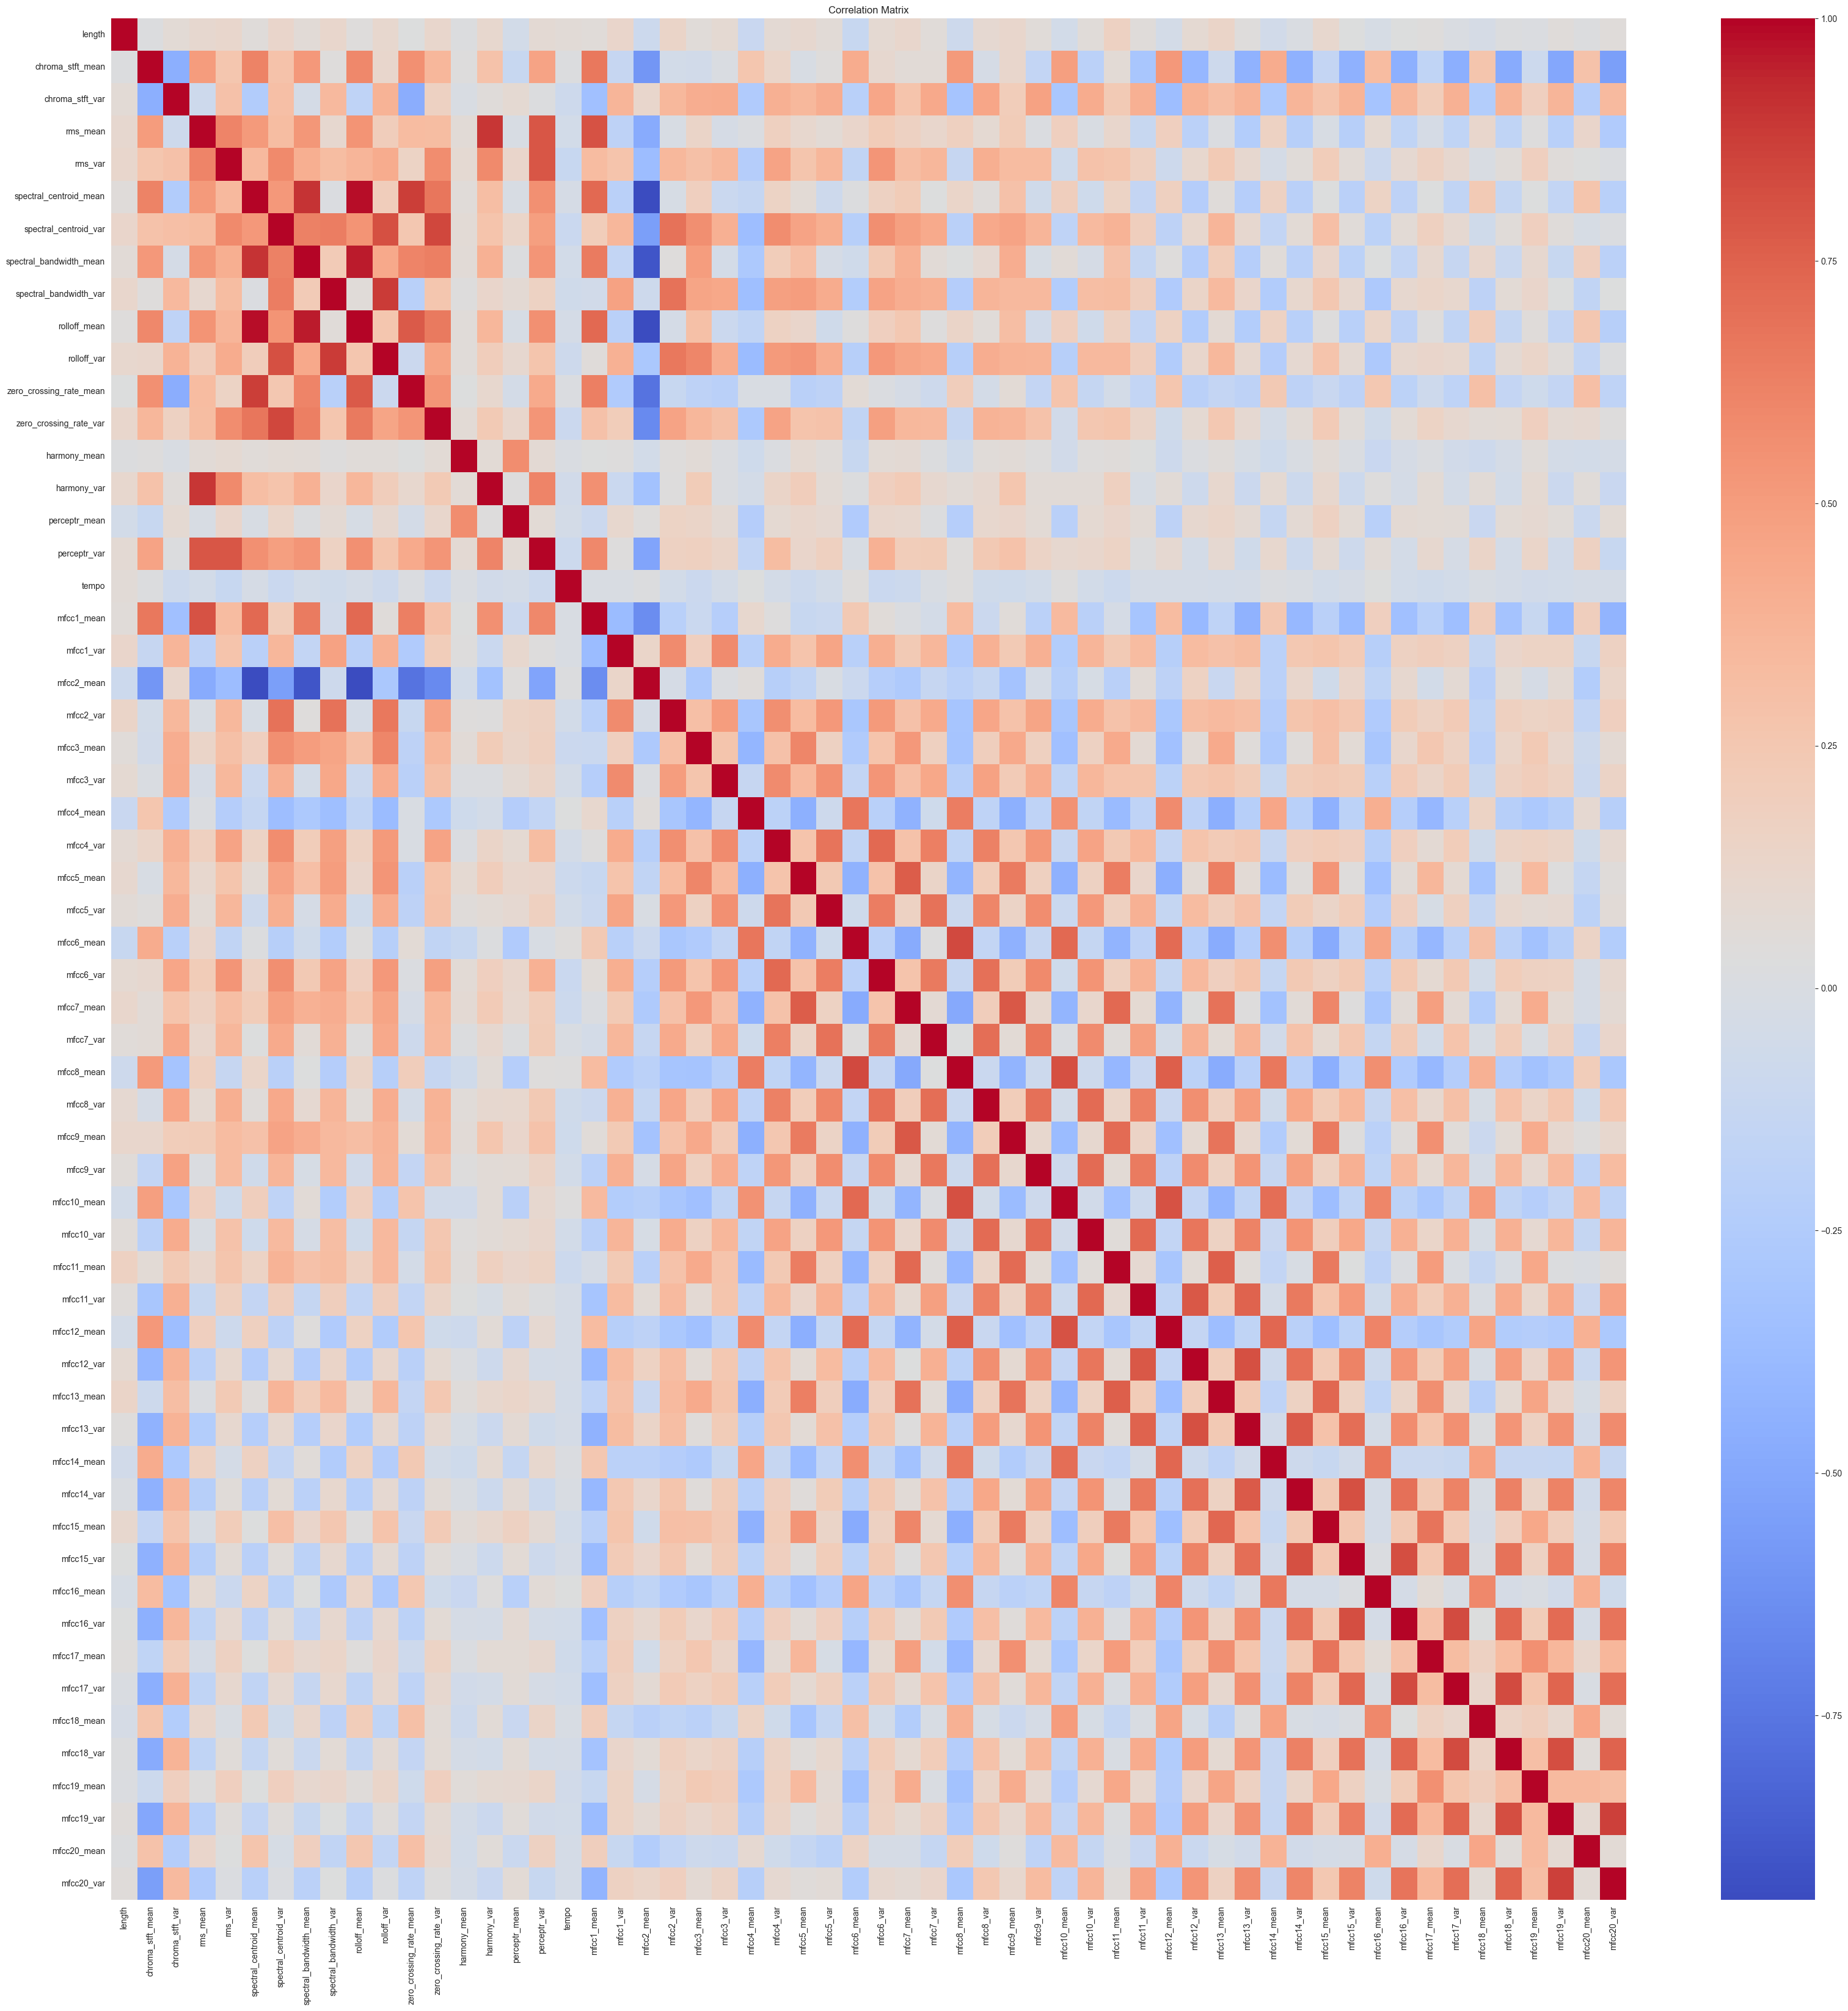

In [22]:
numerical_features = [col for col in df_30.columns if df_30[col].dtype!='object']
corr = df_30[numerical_features].corr()
threshold = 0.9
plt.figure(figsize=(40, 40))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")

plt.show()

In [23]:
df_30 = df_30.drop(columns=["filename"])

y = df_30['label']
X = df_30.loc[:, df_30.columns != 'label']

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


# PCA 2 COMPONENTS
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

array([0.2439355 , 0.21781804])

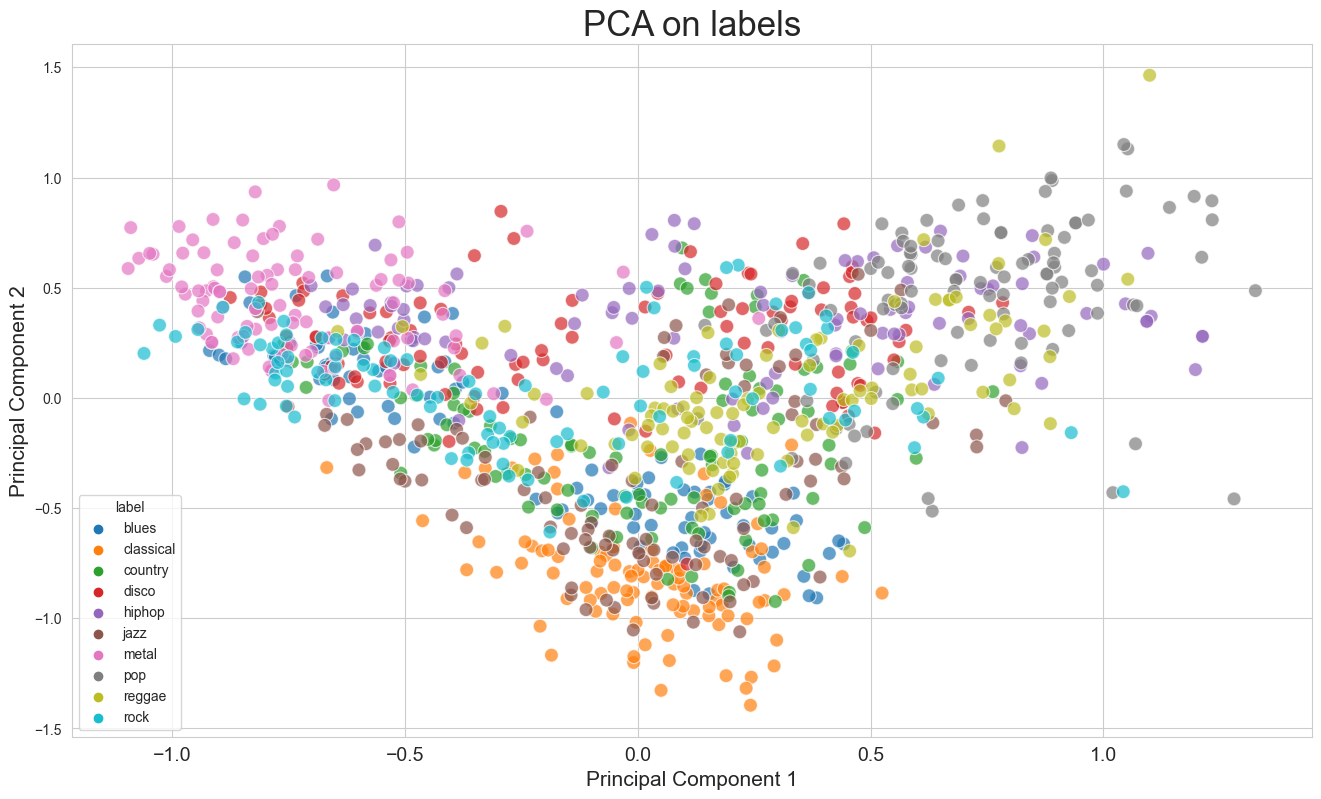

In [24]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7, s = 100)
plt.title('PCA on labels', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.show()

## EDA of the 3 second features

In [25]:
df_3 = pd.read_csv(path + "features_3_sec.csv")
df_3.head(5)

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [26]:
df_3.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [27]:
df_3.isna().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [28]:
df_3['label'].value_counts()

blues        1000
jazz         1000
metal        1000
pop          1000
reggae       1000
disco         999
classical     998
hiphop        998
rock          998
country       997
Name: label, dtype: int64

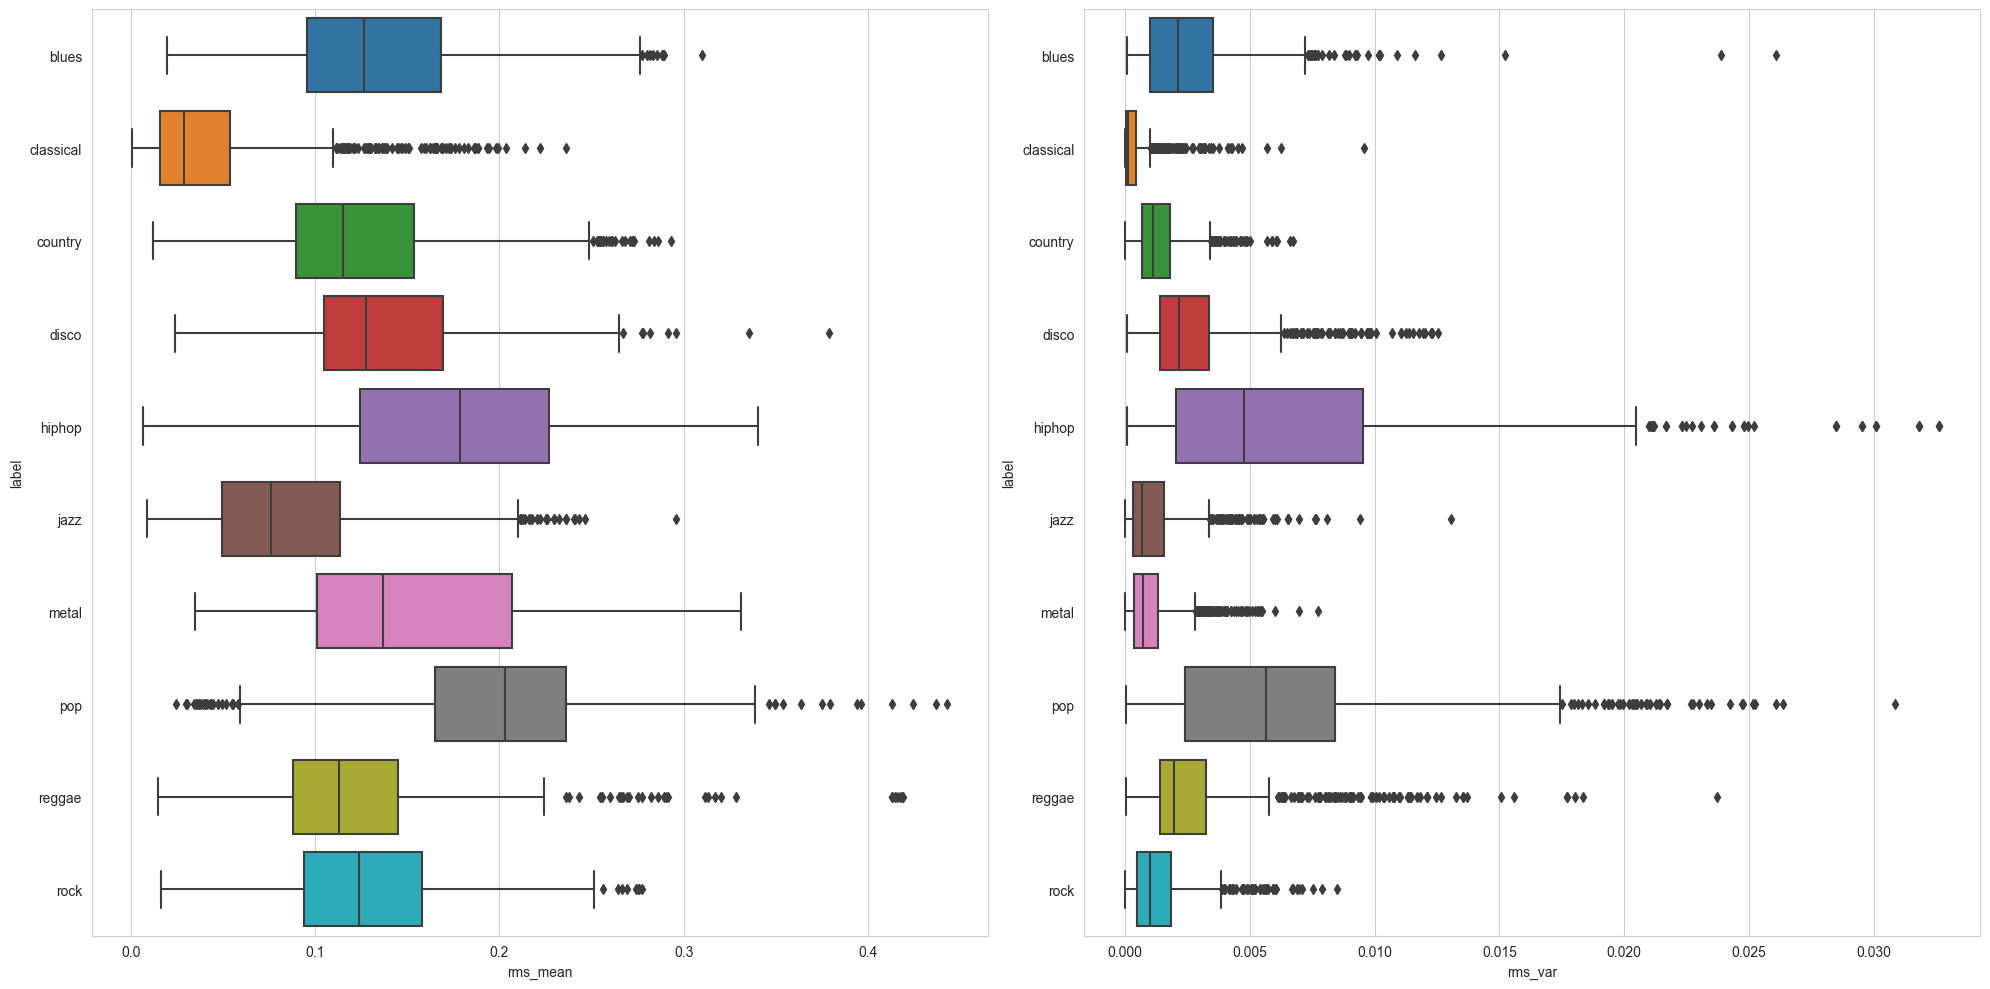

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(y='label', x='rms_mean', data=df_3, ax=axs[0])
sns.boxplot(y='label', x='rms_var', data=df_3, ax=axs[1])
plt.tight_layout()

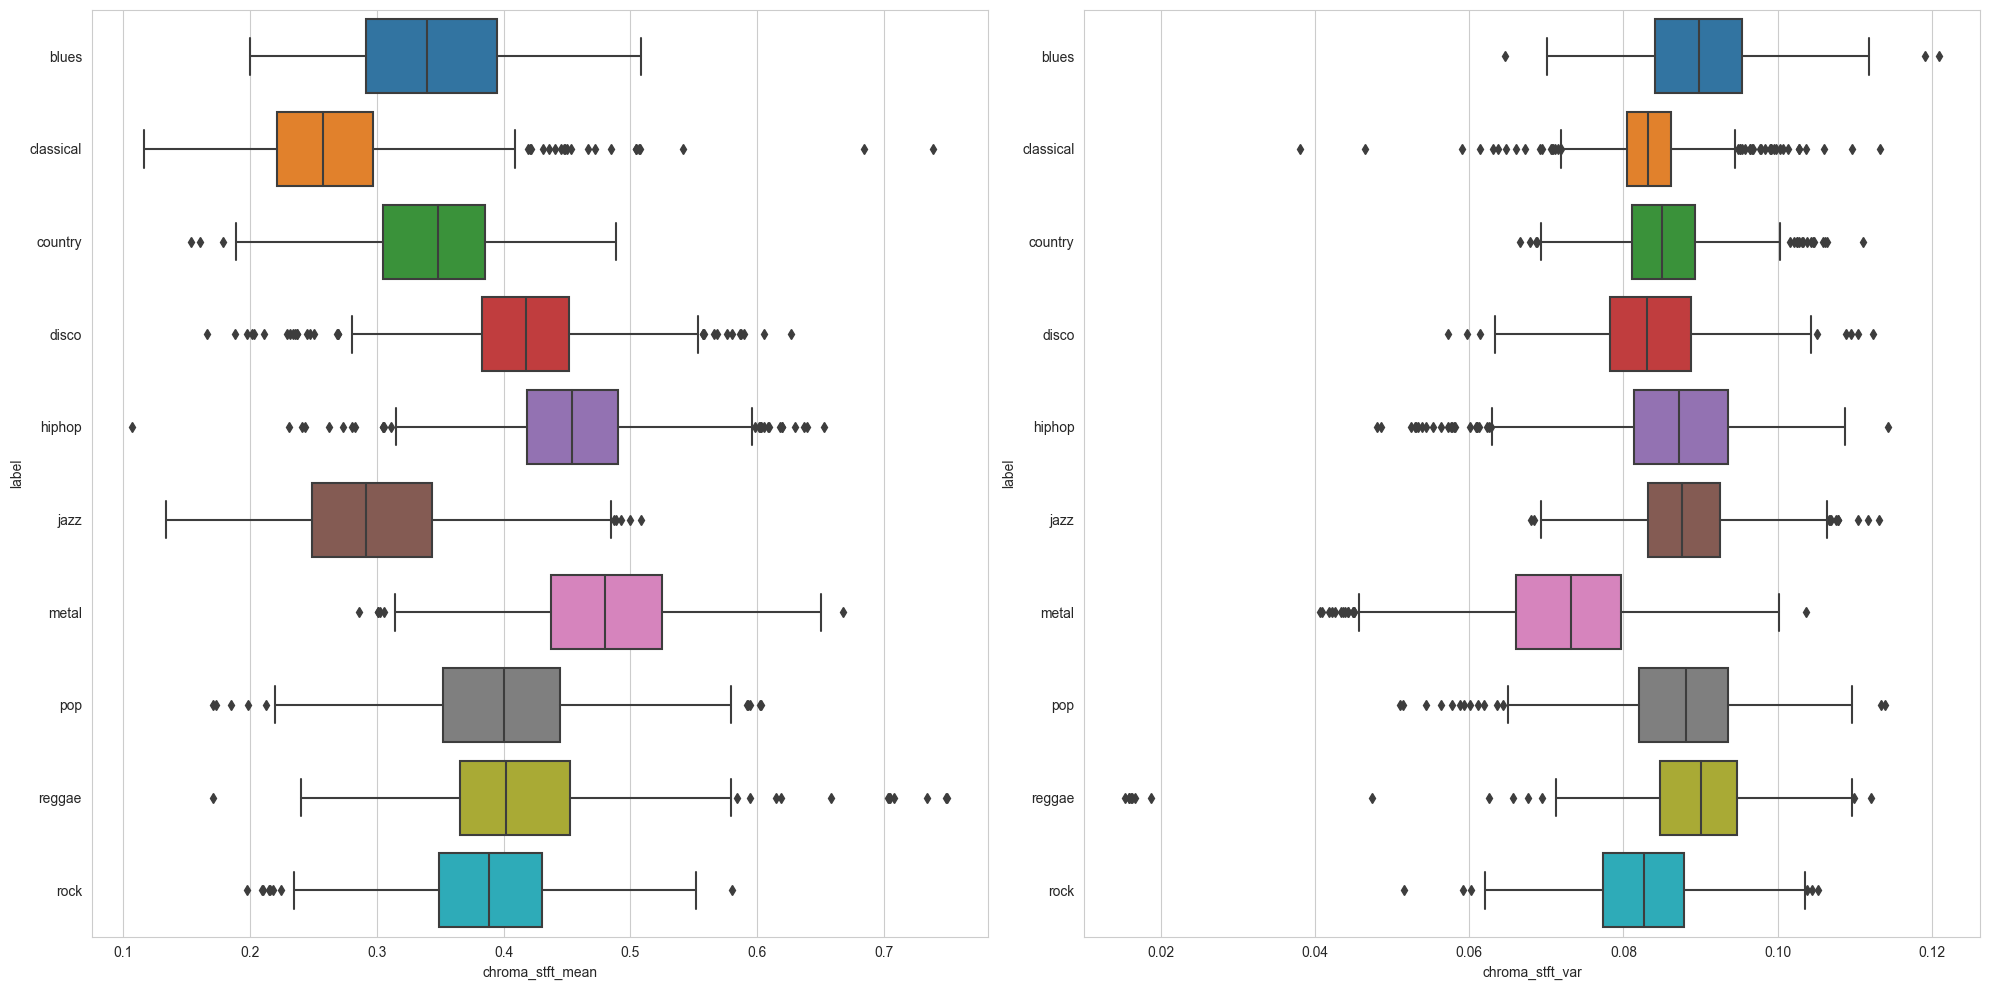

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(y='label', x='chroma_stft_mean', data=df_3, ax=axs[0])
sns.boxplot(y='label', x='chroma_stft_var', data=df_3, ax=axs[1])
plt.tight_layout()

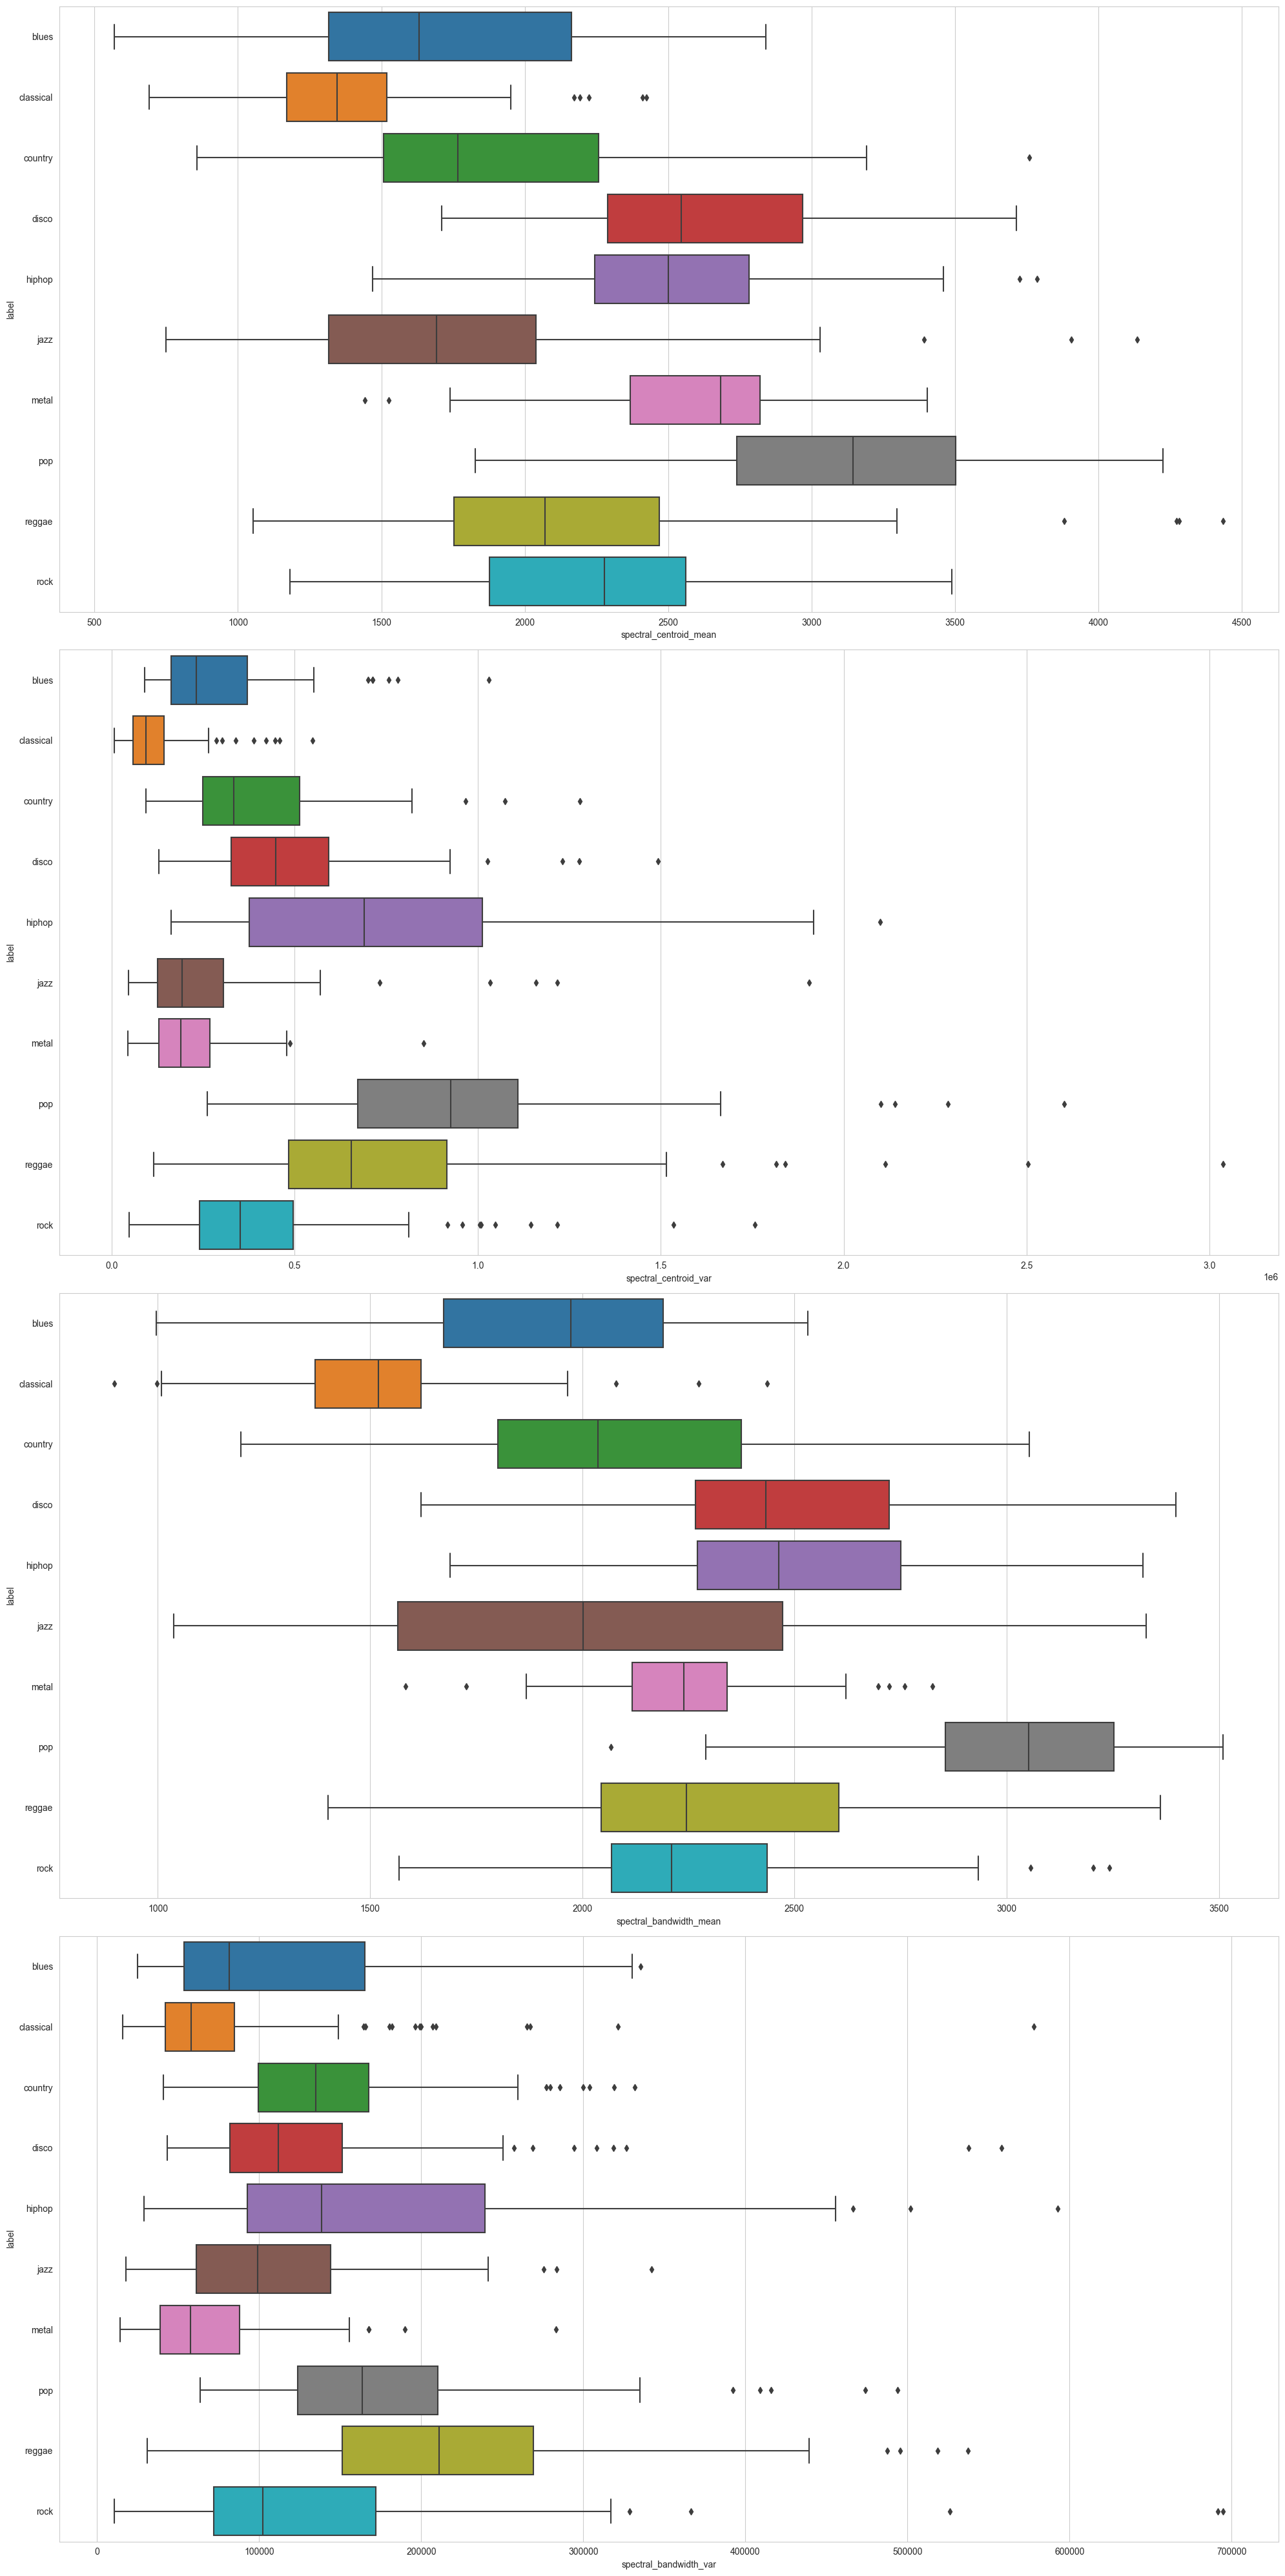

In [31]:
fig, axs = plt.subplots(4, 1, figsize=(20, 40))
sns.boxplot(y='label', x='spectral_centroid_mean', data=df_30, ax=axs[0])
sns.boxplot(y='label', x='spectral_centroid_var', data=df_30, ax=axs[1])
sns.boxplot(y='label', x='spectral_bandwidth_mean', data=df_30, ax=axs[2])
sns.boxplot(y='label', x='spectral_bandwidth_var', data=df_30, ax=axs[3])
plt.tight_layout()

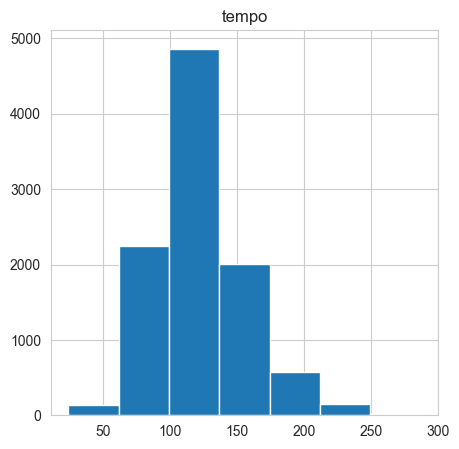

In [32]:
df_3.hist(column = ["tempo"], bins = 7, figsize=(5, 5))
plt.show()

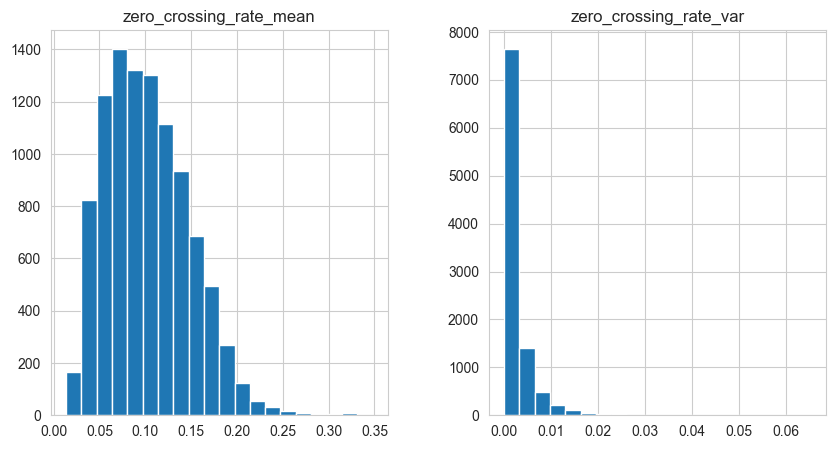

In [33]:
df_3.hist(column = ["zero_crossing_rate_mean", "zero_crossing_rate_var"], bins = 20, figsize=(10, 5))
plt.show()

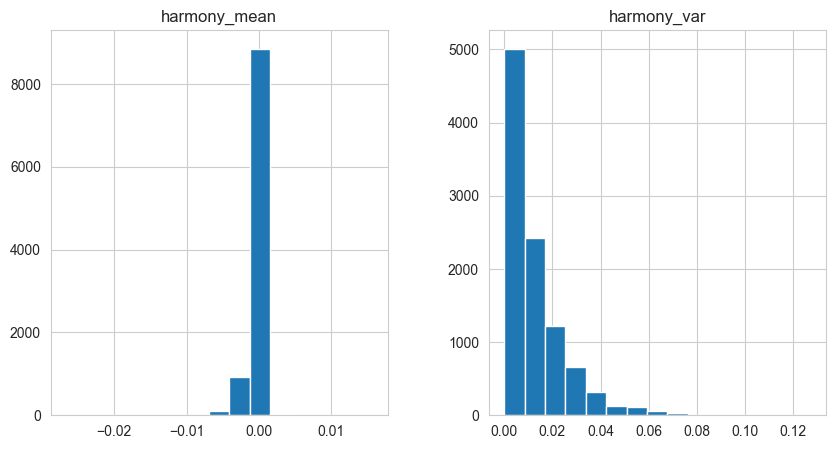

In [34]:
df_3.hist(column = ["harmony_mean", "harmony_var"], bins = 15, figsize=(10, 5))
plt.show()

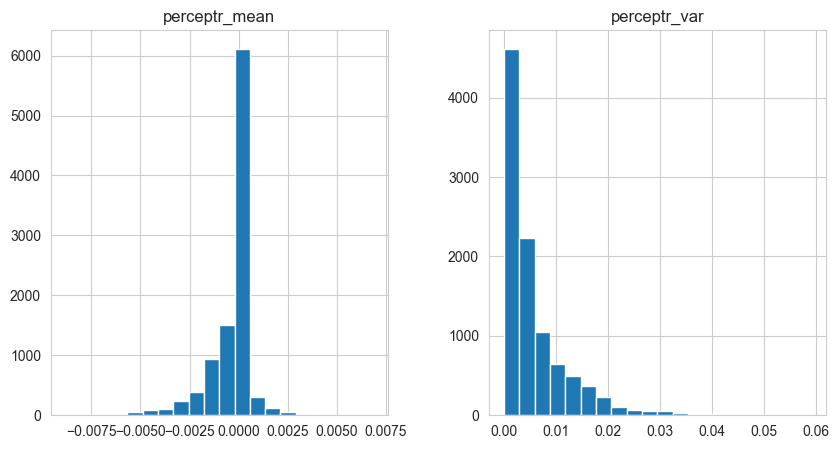

In [35]:
df_3.hist(column = ["perceptr_mean", "perceptr_var"], bins = 20, figsize=(10, 5))
plt.show()

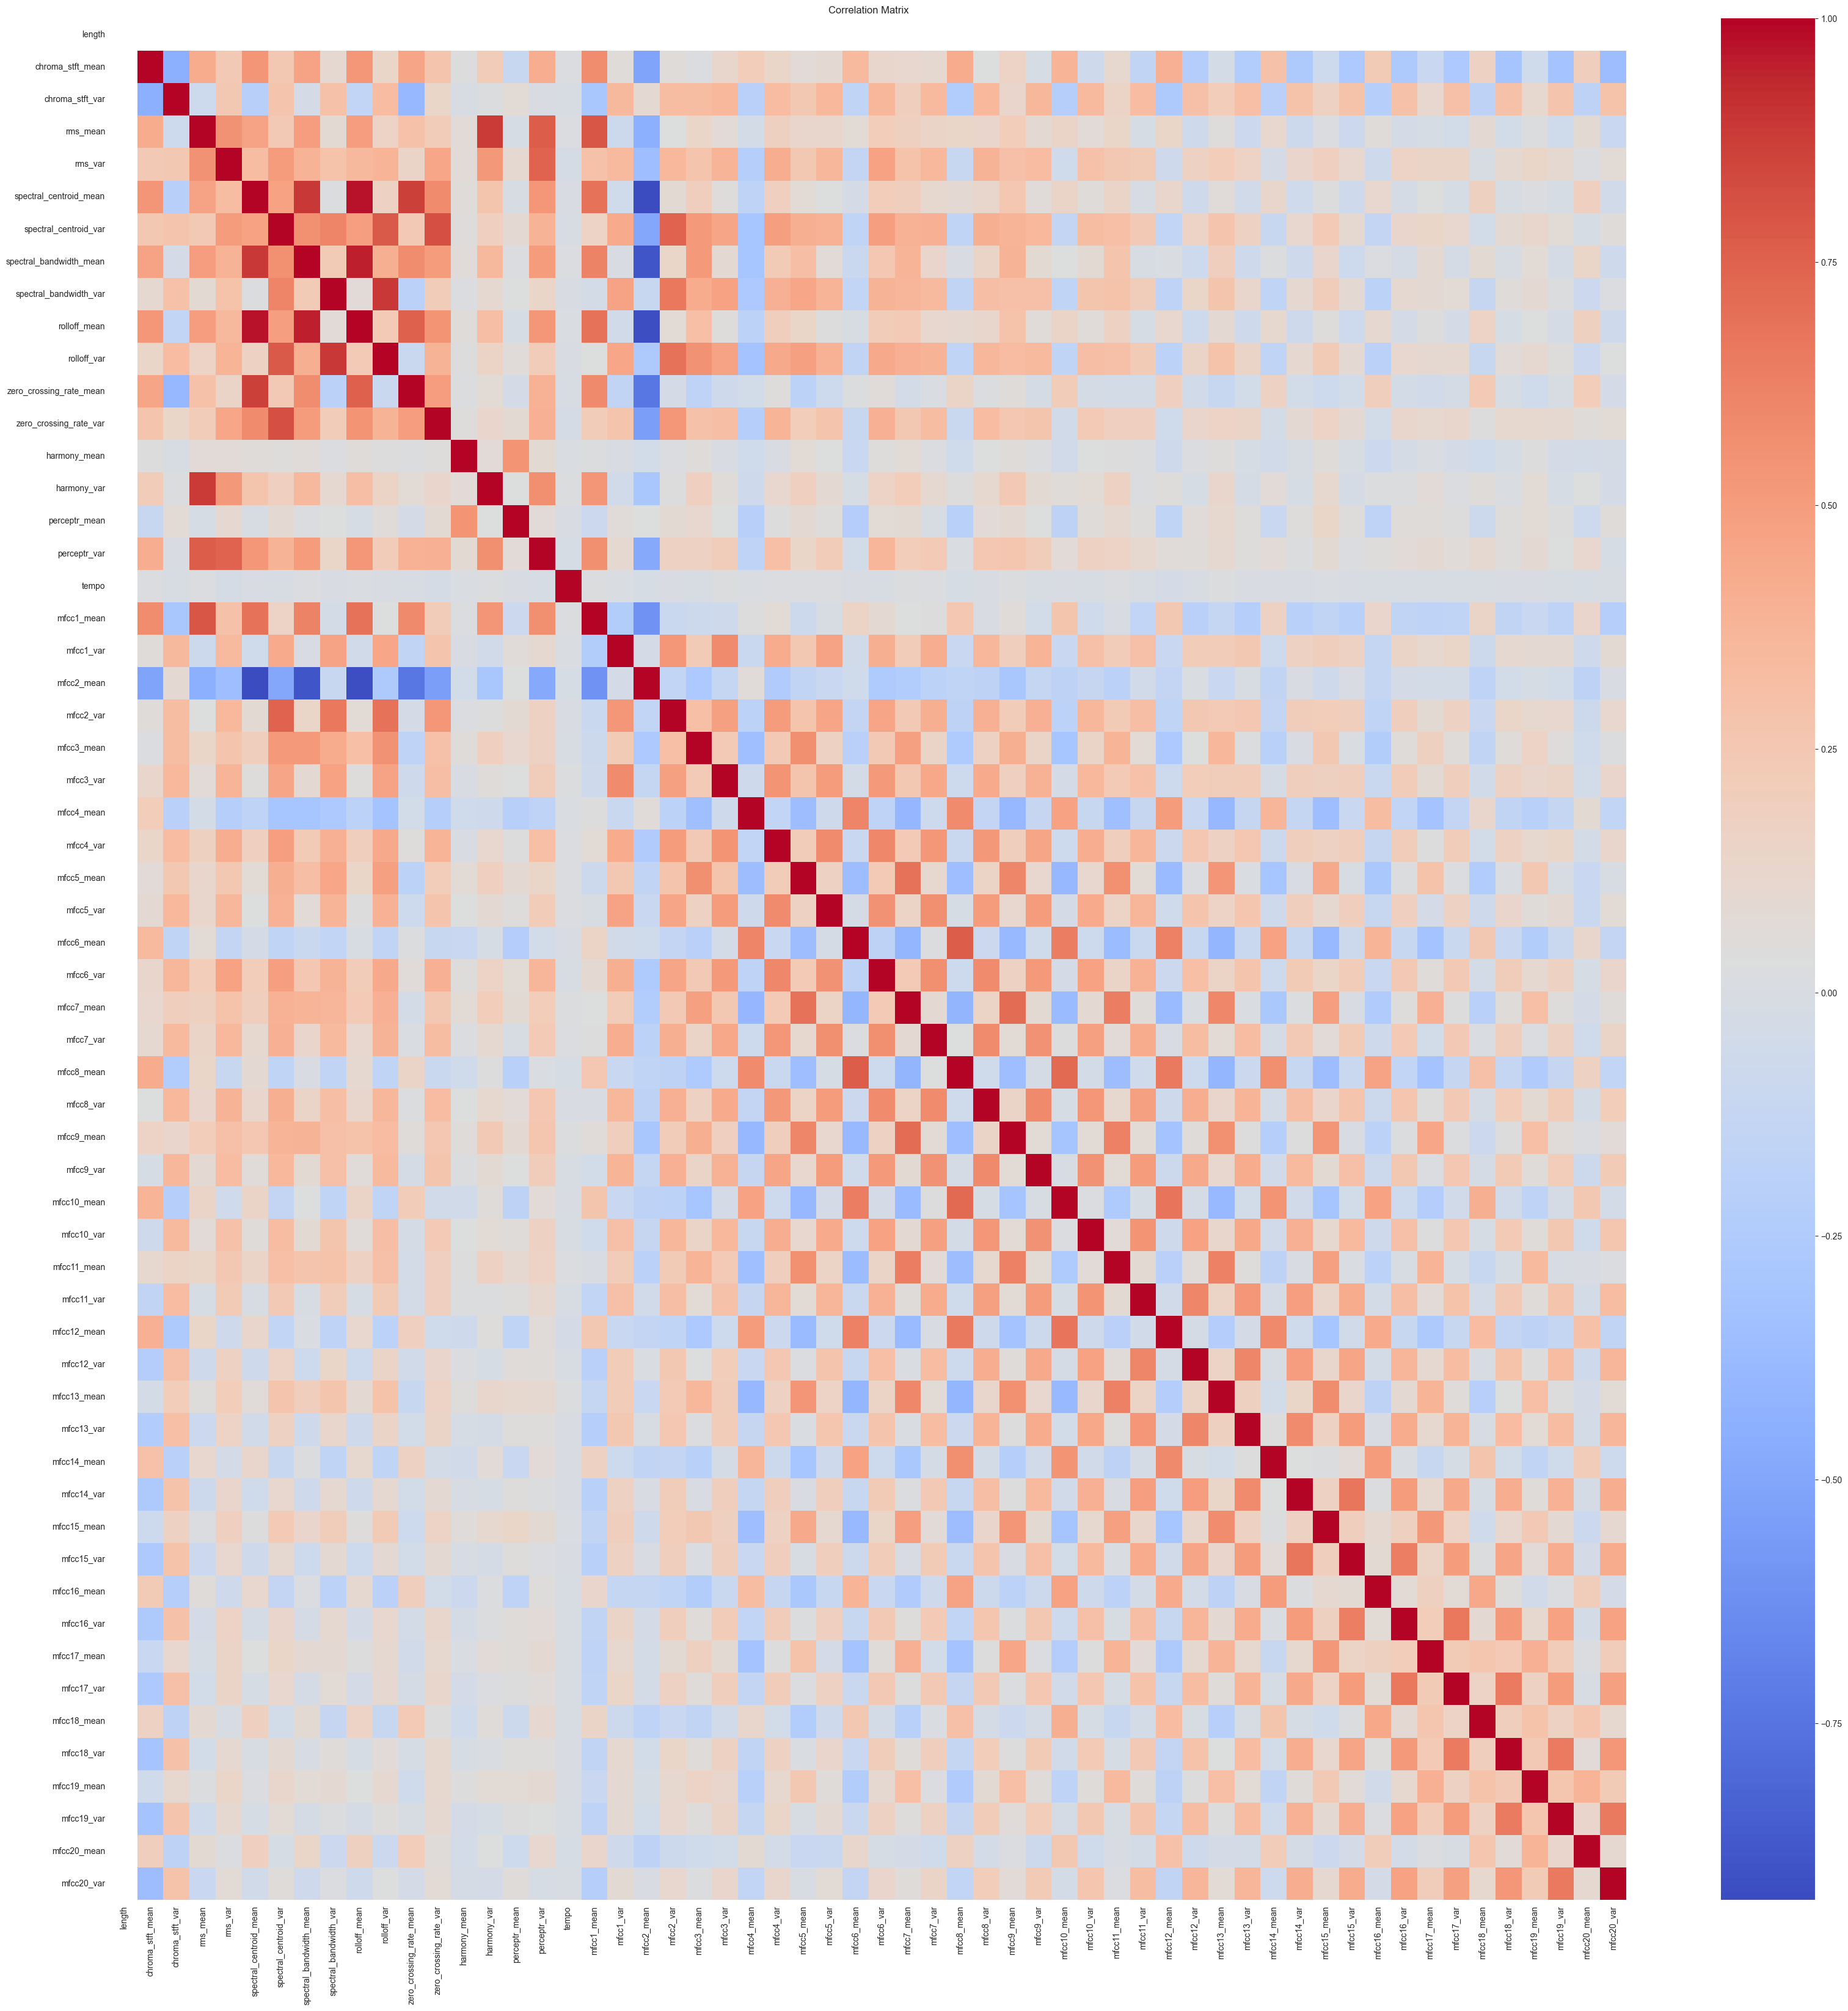

In [36]:
numerical_features = [col for col in df_3.columns if df_3[col].dtype!='object']
corr = df_3[numerical_features].corr()
threshold = 0.9
plt.figure(figsize=(40, 40))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")

plt.show()

In [37]:
df_3 = df_3.drop(columns=["filename"])

y = df_3['label']
X = df_3.loc[:, df_3.columns != 'label']

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


# PCA 2 COMPONENTS
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

array([0.26745621, 0.18238003])

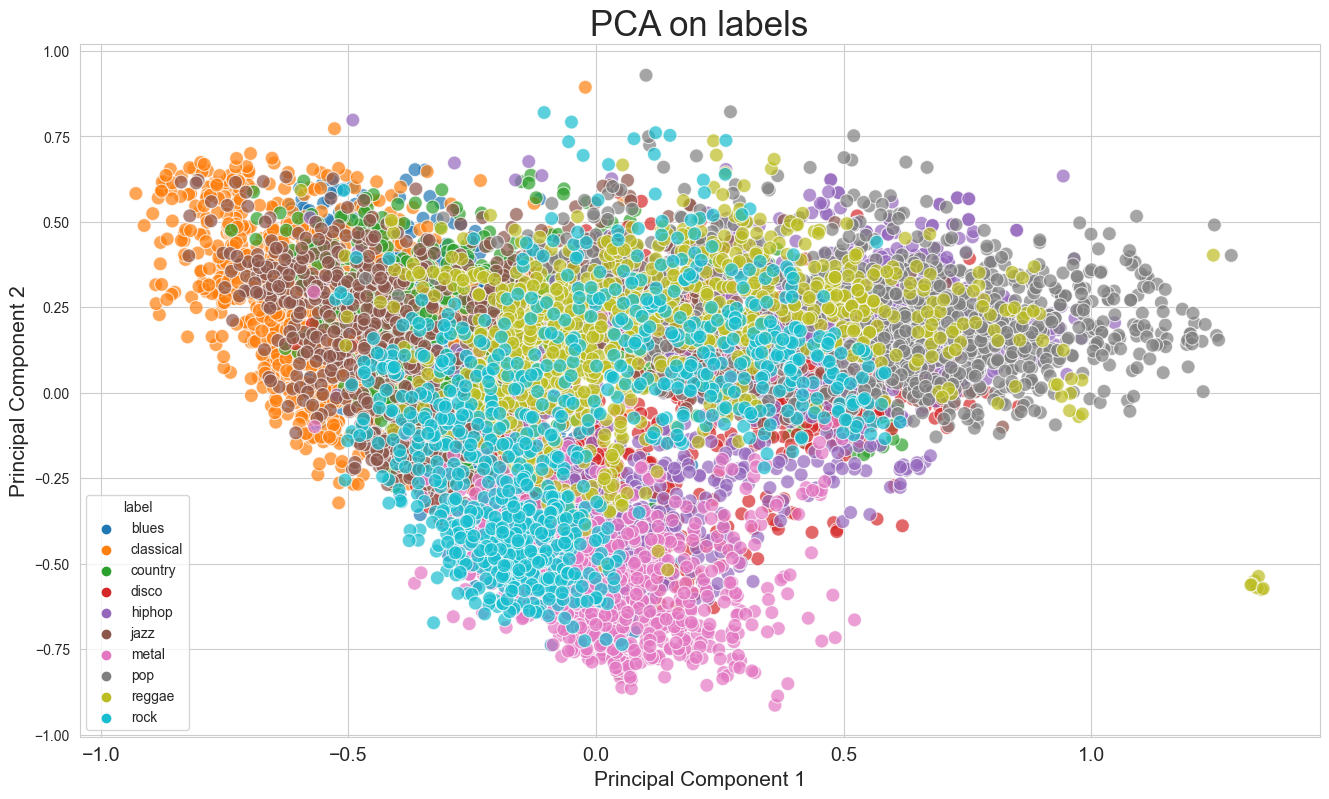

In [38]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7, s = 100)
plt.title('PCA on labels', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.show()